## Important libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## dataset loading

In [2]:
!pip install opendatasets -q
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/kevinarvai/clinvar-conflicting")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mennashaban
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kevinarvai/clinvar-conflicting


100%|██████████| 3.59M/3.59M [00:00<00:00, 110MB/s]

## data preprocessing

In [3]:
df = pd.read_csv('/content/clinvar-conflicting/clinvar_conflicting.csv')
df.head(10)

<ipython-input-3-dc05f8e0b13d>:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/clinvar-conflicting/clinvar_conflicting.csv')


CHROM      POS REF ALT  AF_ESP  AF_EXAC  AF_TGP  \
0     1  1168180   G   C  0.0771  0.10020  0.1066   
1     1  1470752   G   A  0.0000  0.00000  0.0000   
2     1  1737942   A   G  0.0000  0.00001  0.0000   
3     1  2160305   G   A  0.0000  0.00000  0.0000   
4     1  2160305   G   T  0.0000  0.00000  0.0000   
5     1  2160554   G   C  0.0000  0.00000  0.0000   
6     1  3328358   T   C  0.0000  0.00000  0.0000   
7     1  3328659   C   T  0.1523  0.13103  0.1060   
8     1  3347452   G   A  0.0000  0.00357  0.0030   
9     1  5925304   G   A  0.0045  0.00231  0.0058   

                                            CLNDISDB CLNDISDBINCL  \
0                                    MedGen:CN169374          NaN   
1  MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...          NaN   
2  Human_Phenotype_Ontology:HP:0000486,MedGen:C00...          NaN   
3  MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...          NaN   
4     MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002          NaN   
5  MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...          NaN   
6                                    MedGen:CN169374          NaN   
7                                    MedGen:CN169374          NaN   
8  MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...          NaN   
9  MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...          NaN   

                                               CLNDN  ...  \
0                                      not_specified  ...   
1             Spinocerebellar_ataxia_21|not_provided  ...   
2  Strabismus|Nystagmus|Hypothyroidism|Intellectu...  ...   
3          Shprintzen-Goldberg_syndrome|not_provided  ...   
4                       Shprintzen-Goldberg_syndrome  ...   
5          Shprintzen-Goldberg_syndrome|not_provided  ...   
6                                      not_specified  ...   
7                                      not_specified  ...   
8  Left_ventricular_noncompaction_8|not_specified...  ...   
9                     Nephronophthisis|not_specified  ...   

                         SIFT           PolyPhen MOTIF_NAME MOTIF_POS  \
0                   tolerated             benign        NaN       NaN   
1  deleterious_low_confidence             benign        NaN       NaN   
2                 deleterious  probably_damaging        NaN       NaN   
3                         NaN                NaN        NaN       NaN   
4                         NaN                NaN        NaN       NaN   
5                         NaN                NaN        NaN       NaN   
6                         NaN                NaN        NaN       NaN   
7                         NaN                NaN        NaN       NaN   
8                         NaN                NaN        NaN       NaN   
9                 deleterious             benign        NaN       NaN   

  HIGH_INF_POS MOTIF_SCORE_CHANGE  LoFtool  CADD_PHRED  CADD_RAW BLOSUM62  
0          NaN                NaN      NaN       1.053 -0.208682      2.0  
1          NaN                NaN      NaN      31.000  6.517838     -3.0  
2          NaN                NaN      NaN      28.100  6.061752     -1.0  
3          NaN                NaN      NaN      22.500  3.114491      NaN  
4          NaN                NaN      NaN      24.700  4.766224     -3.0  
5          NaN                NaN      NaN      23.700  4.079099     -2.0  
6          NaN                NaN    0.101       0.172 -0.543433     -1.0  
7          NaN                NaN    0.101      23.000  3.424422     -3.0  
8          NaN                NaN    0.101      11.360  1.126629      1.0  
9          NaN                NaN    0.021      22.100  2.969650     -1.0  

[10 rows x 46 columns]

In [4]:
df.shape

(65188, 46)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

## Removing Nans

In [6]:
df.isna().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [7]:
labels=['CLNDISDBINCL' ,'CLNDNINCL' ,'CLNSIGINCL' ,'CLNVI' ,'SSR' ,'INTRON' ,'DISTANCE','CLNDISDB', 'CLNHGVS',
        'Codons','BAM_EDIT' ,'MOTIF_NAME' ,'MOTIF_POS' ,'HIGH_INF_POS','MOTIF_SCORE_CHANGE' ,'BLOSUM62']

df.drop(labels,axis = 1 ,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   CLNDN             65188 non-null  object 
 8   CLNVC             65188 non-null  object 
 9   MC                64342 non-null  object 
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  object 
 13  Consequence       65188 non-null  object 
 14  IMPACT            65188 non-null  object 
 15  SYMBOL            65172 non-null  object 
 16  Feature_type      65174 non-null  object

## Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
df_num=df.copy()
for column in df.columns:
    # Check if the column's dtype is 'object'
    if df[column].dtype == 'object':
        # Apply label encoding to the column after converting to string
        df_num[column] = label_encoder.fit_transform(df[column].astype(str))

df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   CLNDN             65188 non-null  int64  
 8   CLNVC             65188 non-null  int64  
 9   MC                65188 non-null  int64  
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  int64  
 13  Consequence       65188 non-null  int64  
 14  IMPACT            65188 non-null  int64  
 15  SYMBOL            65188 non-null  int64  
 16  Feature_type      65188 non-null  int64 

## Scaling

In [9]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
scaled_standard =sc.fit_transform(df_num)
scaled_standard_df = pd.DataFrame(scaled_standard, columns=df_num.columns)
print("\nStandardized Data:")
print(scaled_standard_df)


Standardized Data:
          CHROM       POS       REF       ALT    AF_ESP   AF_EXAC    AF_TGP  \
0     -1.512662 -1.279004  0.536855 -0.440465  1.082957  1.439460  1.534372   
1     -1.512662 -1.273939  0.536855 -1.211217 -0.251069 -0.243396 -0.256413   
2     -1.512662 -1.269467 -1.625031  0.337559 -0.251069 -0.243228 -0.256413   
3     -1.512662 -1.262397  0.536855 -1.211217 -0.251069 -0.243396 -0.256413   
4     -1.512662 -1.262397  0.536855  1.224652 -0.251069 -0.243396 -0.256413   
...         ...       ...       ...       ...       ...       ...       ...   
65183  1.967075  1.281925  1.560906  0.337559  1.134865  2.094968  2.439844   
65184  1.967075  1.281940 -0.516879  1.224652 -0.216464 -0.233319 -0.234574   
65185  1.967075  1.282539 -0.516879  1.224652 -0.034787 -0.181254 -0.069943   
65186  1.967075  1.287482  1.560906 -0.440465 -0.245878 -0.237685 -0.256413   
65187  1.967075  1.287789  0.536855 -0.440465 -0.218194 -0.198553 -0.242974   

          CLNDN     CLNVC      

## BOXPLOTING

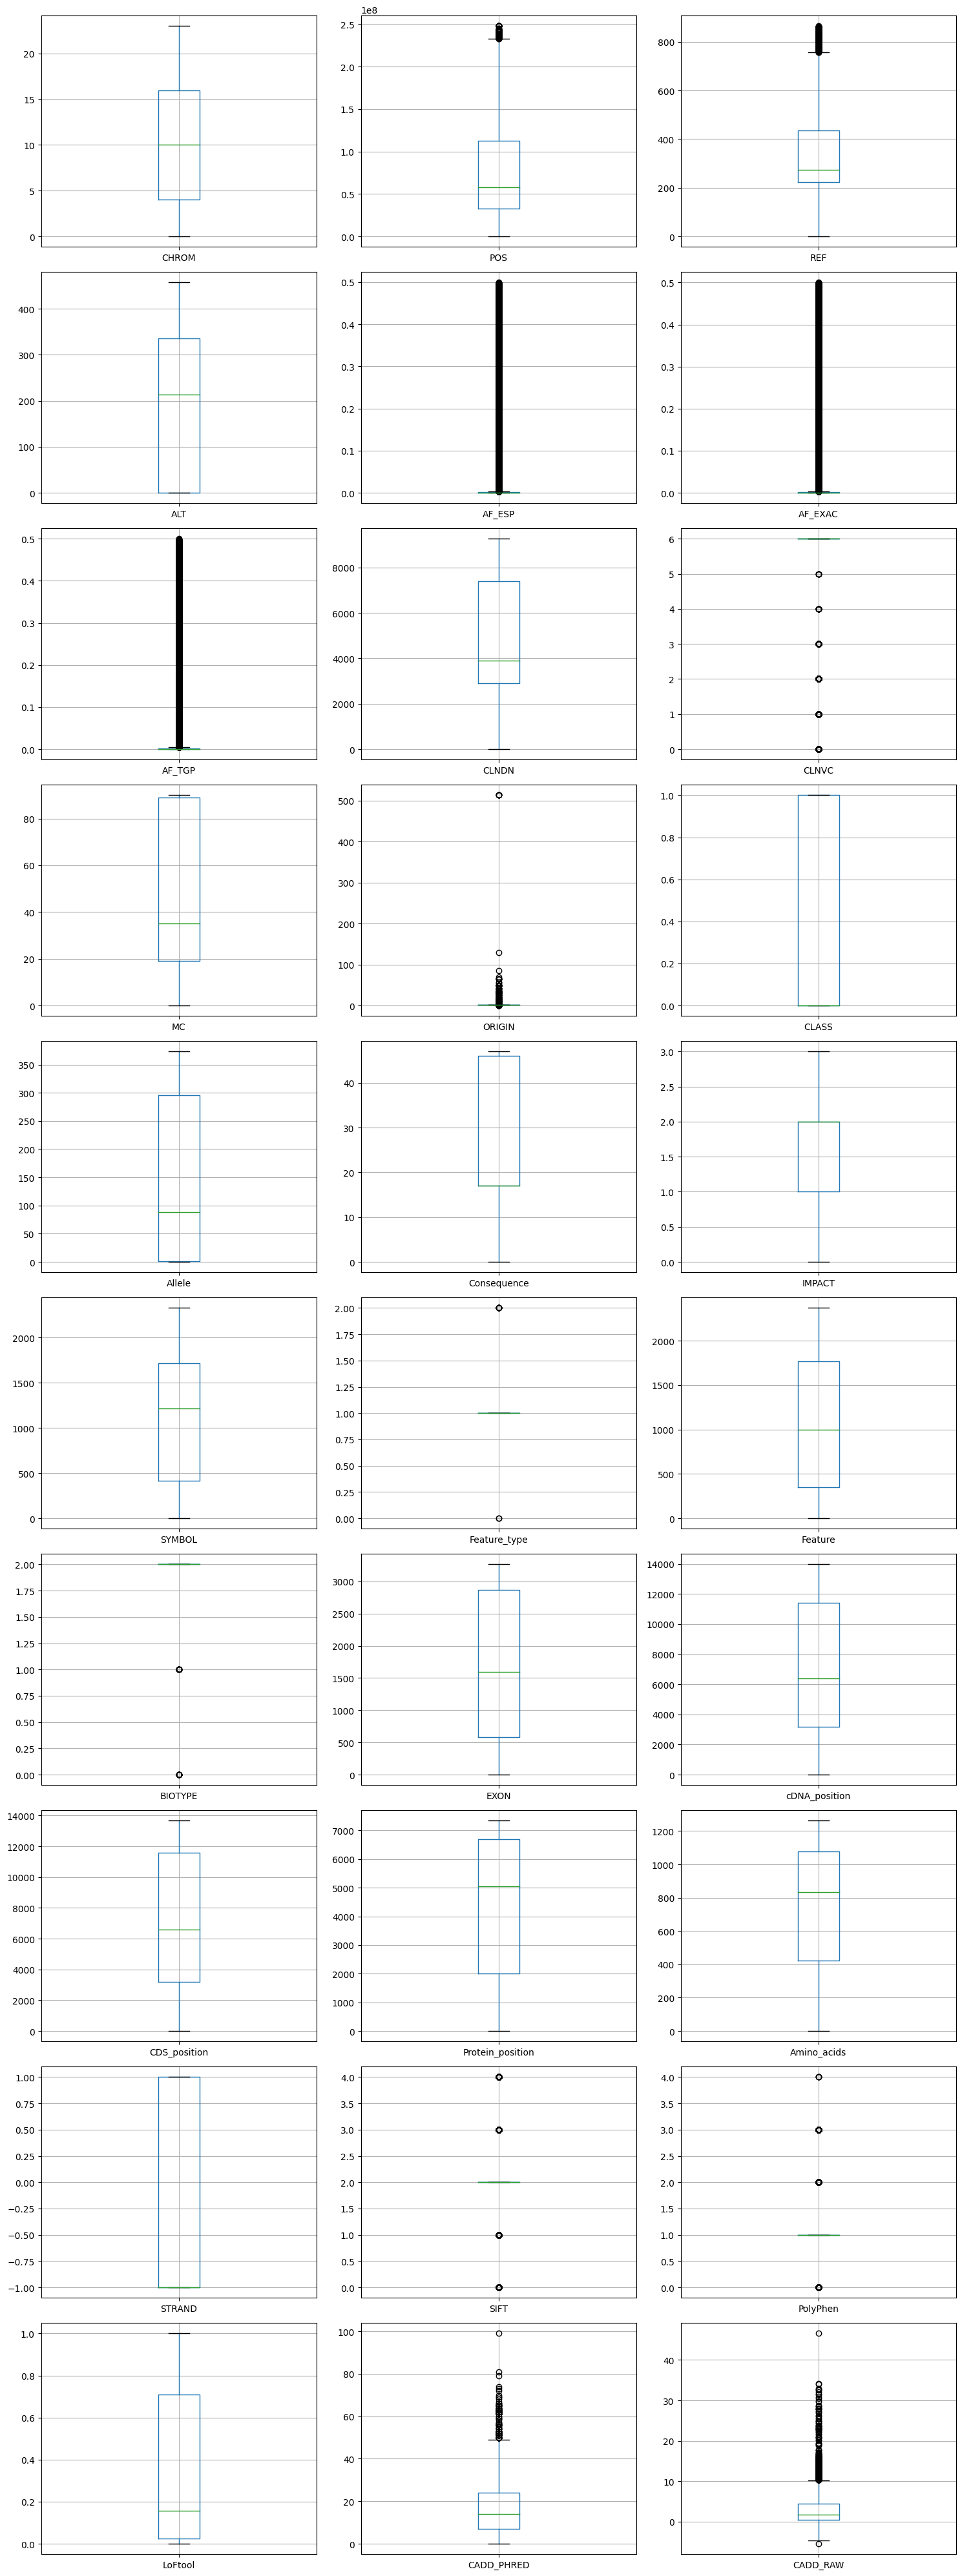

In [10]:

#df_numeric = df.select_dtypes(include=['number'])
num_columns = 3
num_rows = (len(df_num.columns) - 1) // num_columns + 1
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

# Iterate through columns and plot boxplots
for i, column in enumerate(df_num.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]

    df_num.boxplot(column=column, ax=ax)


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Outliers Removal

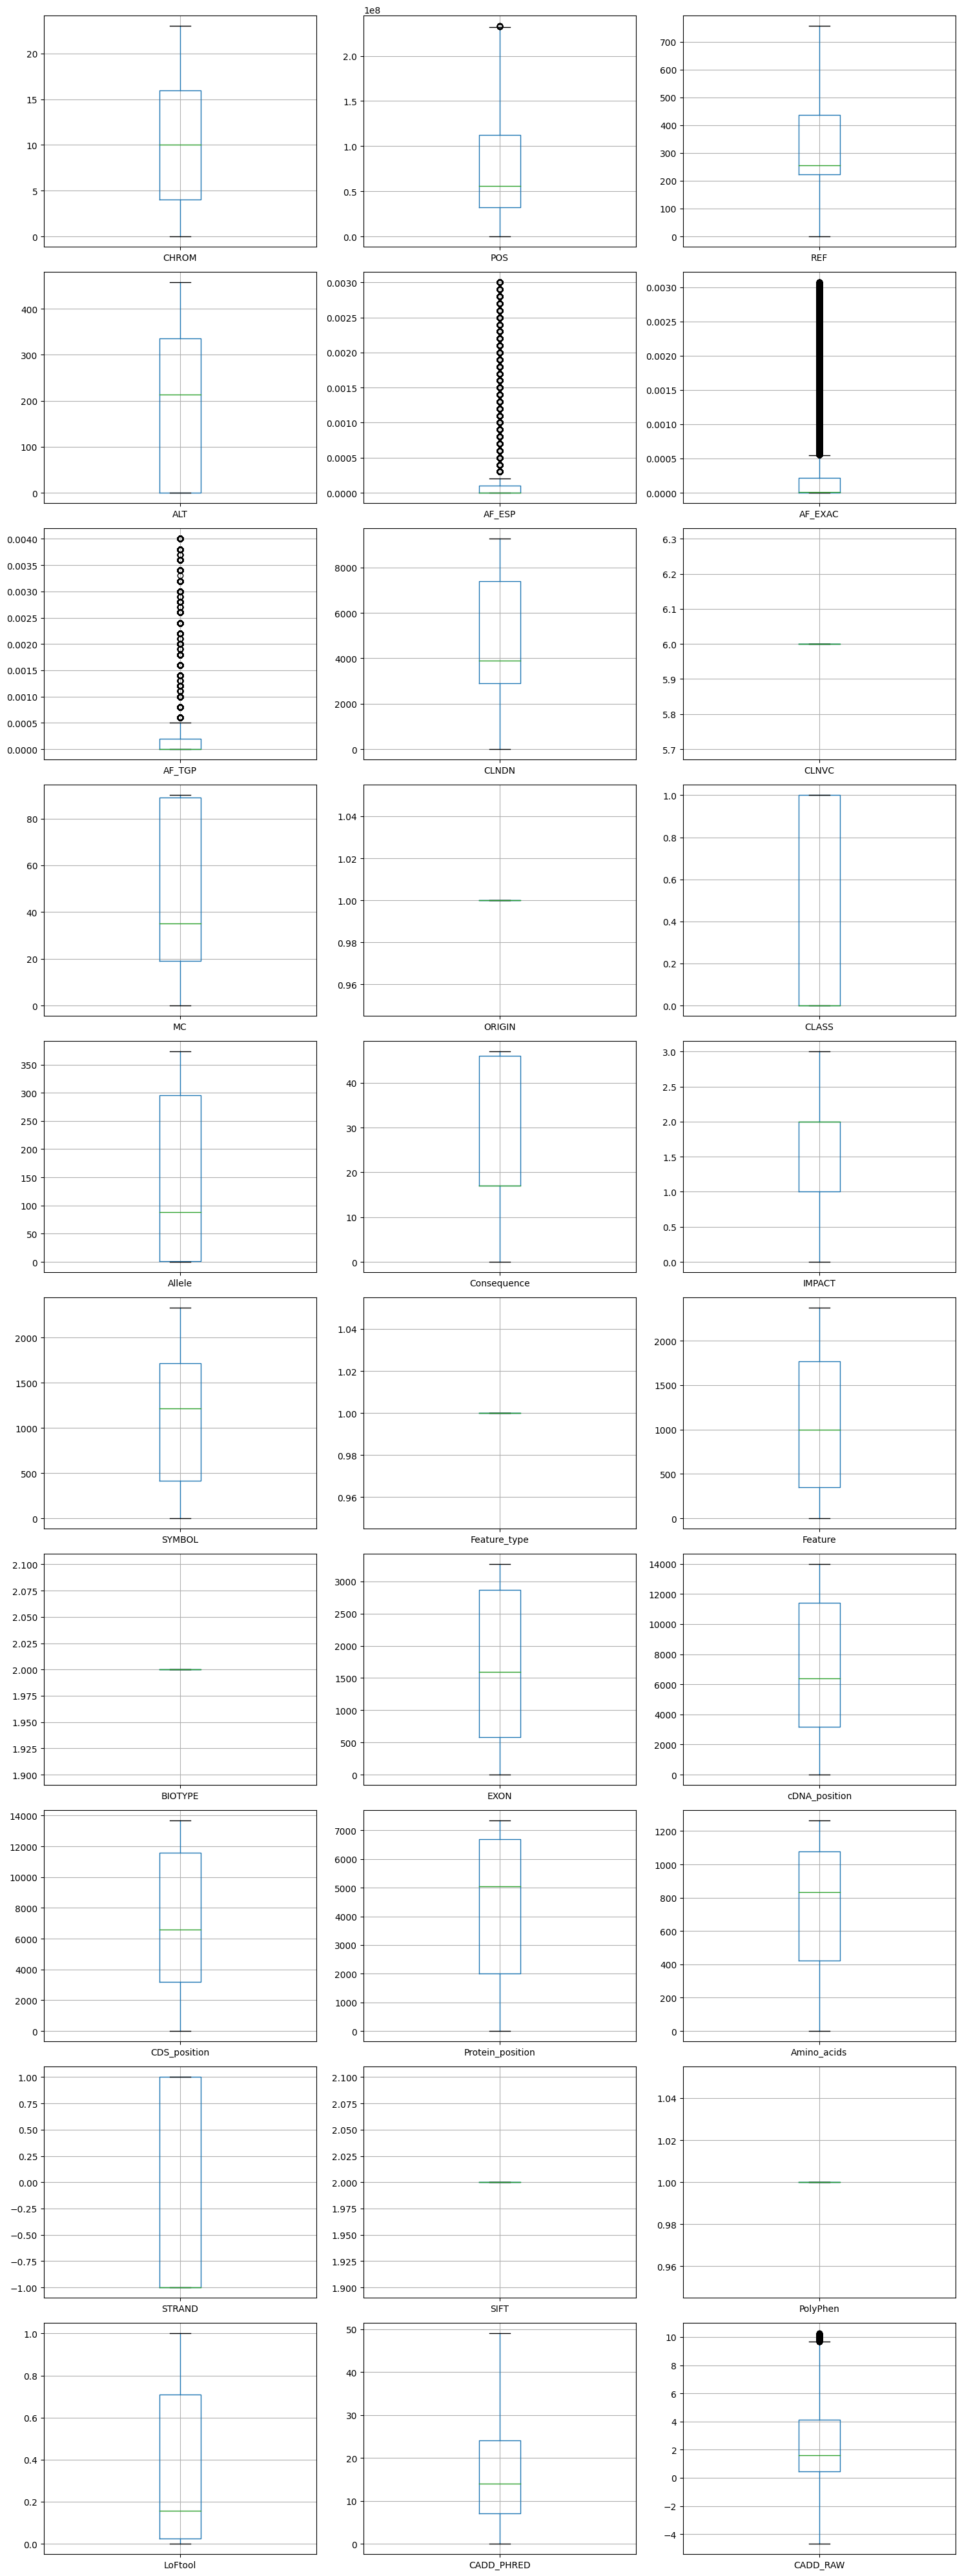

In [11]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers for each column
df_num_clean = df_num.apply(remove_outliers, axis=0)

# Visualize box plots for clean data
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

# Iterate through columns and plot boxplots
for i, column in enumerate(df_num_clean.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    if column in df_num.columns:
       df_num_clean.boxplot(column=column, ax=ax)
    else:
       print(f"Column '{column}' not found in df_numeric")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   CLNDN             65188 non-null  int64  
 8   CLNVC             65188 non-null  int64  
 9   MC                65188 non-null  int64  
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  int64  
 13  Consequence       65188 non-null  int64  
 14  IMPACT            65188 non-null  int64  
 15  SYMBOL            65188 non-null  int64  
 16  Feature_type      65188 non-null  int64 

In [13]:
df_num_clean.isna().sum()

CHROM                   0
POS                  1197
REF                   180
ALT                     0
AF_ESP              12721
AF_EXAC             11866
AF_TGP              12037
CLNDN                   0
CLNVC                3907
MC                      0
ORIGIN               1248
CLASS                   0
Allele                  0
Consequence             0
IMPACT                  0
SYMBOL                  0
Feature_type           16
Feature                 0
BIOTYPE                30
EXON                    0
cDNA_position           0
CDS_position            0
Protein_position        0
Amino_acids             0
STRAND                 14
SIFT                24836
PolyPhen            24796
LoFtool              4213
CADD_PHRED           1223
CADD_RAW             2459
dtype: int64

In [14]:
df_num_clean['POS'] = df_num['POS'].fillna( df_num['POS'].mean())
df_num_clean['REF'] = df_num['REF'].fillna( df_num['REF'].mean())
df_num_clean['LoFtool'] = df_num['LoFtool'].fillna( df_num['LoFtool'].mean())
df_num_clean.dropna(subset=['STRAND'], inplace=True)
df_num_clean.dropna(subset=['Feature_type'], inplace=True)
df_num_clean.drop(['AF_ESP','AF_EXAC','AF_TGP'], axis=1, inplace=True)
df_num_clean.dropna(subset=['BIOTYPE'], inplace=True)
most_frequent_value = df_num_clean['ORIGIN'].mode()[0]
df_num_clean['ORIGIN'] = df_num_clean['ORIGIN'].fillna(most_frequent_value)
df_num_clean['LoFtool'] = (df_num_clean['LoFtool'].fillna(method='ffill') + df_num['LoFtool'].fillna(method='bfill')) / 2
df_num_clean.dropna(subset=['CADD_PHRED'], inplace=True)
df_num_clean.dropna(subset=['CADD_RAW'], inplace=True)
df_num_clean.dropna(subset=['CLNVC'], inplace=True)
df_num_clean.dropna(subset=['SIFT'], inplace=True)
df_num_clean.dropna(subset=['PolyPhen'], inplace=True)

df_num_clean.isna().sum()

CHROM               0
POS                 0
REF                 0
ALT                 0
CLNDN               0
CLNVC               0
MC                  0
ORIGIN              0
CLASS               0
Allele              0
Consequence         0
IMPACT              0
SYMBOL              0
Feature_type        0
Feature             0
BIOTYPE             0
EXON                0
cDNA_position       0
CDS_position        0
Protein_position    0
Amino_acids         0
STRAND              0
SIFT                0
PolyPhen            0
LoFtool             0
CADD_PHRED          0
CADD_RAW            0
dtype: int64

In [15]:
df_num_clean.shape

(35037, 27)

In [16]:
df_num_clean

CHROM        POS  REF  ALT  CLNDN  CLNVC  MC  ORIGIN  CLASS  Allele  \
3          0    2160305  437    0   8156    6.0  19     1.0      0       1   
4          0    2160305  437  335   8154    6.0  19     1.0      0     296   
5          0    2160554  437  106   8156    6.0  19     1.0      0      88   
6          0    3328358  644  106   8960    6.0  19     1.0      0      88   
7          0    3328659  224  335   8960    6.0  19     1.0      0     296   
...      ...        ...  ...  ...    ...    ...  ..     ...    ...     ...   
65182     23  154157565  224  335   9085    6.0  89     1.0      0     296   
65183     23  154158201  644  213   3915    6.0  89     1.0      0     168   
65185     23  154194886  224  335   9085    6.0  89     1.0      0     296   
65186     23  154490187  644  106   6683    6.0  89     1.0      0      88   
65187     23  154508542  437  106   9253    6.0  19     1.0      0      88   

       ...  cDNA_position  CDS_position  Protein_position  Amino_acids  \
3      ...           1616             4              4579          377   
4      ...           1616             4              4579          362   
5      ...           6404          5842               356          376   
6      ...           3011          2401              5980          986   
7      ...           3630          3048              6322          756   
...    ...            ...           ...               ...          ...   
65182  ...           7694          7320               988          748   
65183  ...           6753          6393               566          968   
65185  ...           1359           656              4928           78   
65186  ...          12153          8625              1613         1070   
65187  ...          11788          8468              1545          750   

       STRAND  SIFT  PolyPhen   LoFtool  CADD_PHRED  CADD_RAW  
3         1.0   2.0       1.0  0.223029      22.500  3.114491  
4         1.0   2.0       1.0  0.223029      24.700  4.766224  
5         1.0   2.0       1.0  0.223029      23.700  4.079099  
6         1.0   2.0       1.0  0.101000       0.172 -0.543433  
7         1.0   2.0       1.0  0.101000      23.000  3.424422  
...       ...   ...       ...       ...         ...       ...  
65182    -1.0   2.0       1.0  0.001580      11.440  1.142527  
65183    -1.0   2.0       1.0  0.001580       0.105 -0.630908  
65185    -1.0   2.0       1.0  0.001580      12.850  1.412434  
65186    -1.0   2.0       1.0  0.242529       0.130 -0.592415  
65187    -1.0   2.0       1.0  0.140000       0.046 -0.786513  

[35037 rows x 27 columns]

In [17]:
df_num_clean.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'CLNDN', 'CLNVC', 'MC', 'ORIGIN', 'CLASS',
       'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature',
       'BIOTYPE', 'EXON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'STRAND', 'SIFT', 'PolyPhen', 'LoFtool', 'CADD_PHRED',
       'CADD_RAW'],
      dtype='object')

## Grouping

In [ ]:
grouped_test1 = df_num_clean.groupby(['CHROM'],as_index=False).mean()
grouped_test1

CHROM           POS         REF         ALT        CLNDN  CLNVC  \
0       0  1.293875e+08  330.488372  166.551439  5433.771384    6.0   
1       1  7.604276e+07  320.957303  164.482397  5561.528090    6.0   
2       2  7.087136e+07  326.784118  164.587256  4705.428911    6.0   
3       3  6.867899e+07  331.130297  154.207464  5201.380139    6.0   
4       4  4.196873e+07  326.336826  160.523952  5385.416168    6.0   
5       5  6.336137e+07  320.292035  160.781416  4105.738053    6.0   
6       6  6.298489e+07  330.623436  161.846416  5179.014790    6.0   
7       7  2.950369e+07  330.246770  165.427649  4943.543497    6.0   
8       8  3.853828e+07  320.905638  161.772514  4688.870399    6.0   
9       9  3.437961e+07  340.554393  156.610879  5749.211297    6.0   
10     10  2.392488e+07  312.829642  181.405026  4688.676320    6.0   
11     11  1.514475e+08  326.181138  169.254491  5277.573728    6.0   
12     12  3.973893e+07  327.940774  166.255125  4431.120729    6.0   
13     13  4.569485e+07  325.582560  167.176252  6047.860853    6.0   
14     14  3.390800e+07  321.129594  158.294004  5697.941973    6.0   
15     15  7.249981e+07  328.680057  166.893831  4725.531564    6.0   
16     16  7.751254e+07  321.308219  182.128767  5433.615068    6.0   
17     17  9.811243e+07  317.329122  166.244473  4705.475047    6.0   
18     18  1.016769e+08  336.886066  162.826230  4796.613115    6.0   
19     19  7.059868e+07  334.234561  166.033586  5118.416576    6.0   
20     20  1.027721e+08  339.681943  159.682860  5036.511457    6.0   
21     21  1.070090e+08  323.412043  166.796346  4855.187415    6.0   
22     23  8.790224e+07  338.264929  157.279045  5806.343105    6.0   

           MC  ORIGIN     CLASS      Allele  ...  cDNA_position  CDS_position  \
0   68.119038     1.0  0.272369  143.491525  ...    7499.914860   7654.903035   
1   69.570037     1.0  0.261423  141.080899  ...    7120.880899   8112.644944   
2   74.452211     1.0  0.244413  140.694722  ...    8685.043272   8786.781265   
3   76.104997     1.0  0.246047  132.656546  ...    8041.962049   8108.135357   
4   69.733533     1.0  0.333832  135.598802  ...   10047.146707  10139.854790   
5   68.976991     1.0  0.275221  137.751327  ...    7285.414159   7358.639823   
6   72.844141     1.0  0.294653  139.019340  ...    7876.969283   8163.001138   
7   67.182601     1.0  0.254091  142.888028  ...    7303.924634   7433.080103   
8   68.256852     1.0  0.219655  137.886453  ...    8720.213782   8746.125685   
9   71.449791     1.0  0.259414  133.562762  ...    7380.956067   7477.391213   
10  69.746593     1.0  0.207411  157.603918  ...    7614.718484   7846.204003   
11  59.937500     1.0  0.300898  145.023391  ...    7927.547717   7959.458084   
12  80.972665     1.0  0.257403  143.783599  ...    7389.651481   7697.471526   
13  70.402597     1.0  0.291280  144.679035  ...    8526.205937   8552.059369   
14  75.230174     1.0  0.214700  136.241779  ...    7869.251451   8363.961315   
15  70.951937     1.0  0.251076  143.573888  ...    7331.081062   7536.543759   
16  69.080822     1.0  0.260274  156.364384  ...    7241.208219   7571.356164   
17  77.761845     1.0  0.207202  141.301958  ...    7969.760581   7976.945673   
18  64.613115     1.0  0.278689  139.461475  ...    7719.624590   7797.993443   
19  61.398700     1.0  0.263272  141.916035  ...    7357.812568   7388.197183   
20  66.571952     1.0  0.252979  137.897342  ...    7469.207149   7578.229148   
21  76.413396     1.0  0.263870  143.819350  ...    7748.861976   7852.271313   
22  75.590662     1.0  0.228013  135.492942  ...    8165.381107   8438.726384   

    Protein_position  Amino_acids    STRAND  SIFT  PolyPhen   LoFtool  \
0        4929.144265   806.189988 -0.007489   2.0       1.0  0.305616   
1        5064.917603   837.140075  0.556554   2.0       1.0  0.337548   
2        4876.156919   856.094627  0.219211   2.0       1.0  0.448181   
3        4530.185958   791.070841 -0.265022   2.0       1.0  0

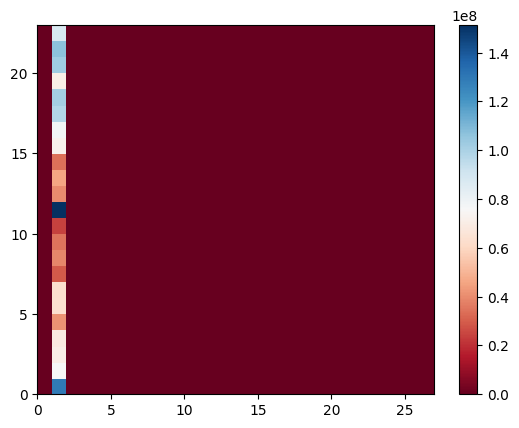

In [ ]:
plt.pcolor(grouped_test1, cmap='RdBu')
plt.colorbar()
plt.show()

## Data Exploring

In [ ]:
df.nunique()

CHROM                  38
POS                 63115
REF                   866
ALT                   458
AF_ESP               2842
AF_EXAC              6667
AF_TGP               2087
CLNDN                9260
CLNVC                   7
MC                     90
ORIGIN                 31
CLASS                   2
Allele                374
Consequence            48
IMPACT                  4
SYMBOL               2328
Feature_type            2
Feature              2369
BIOTYPE                 2
EXON                 3264
cDNA_position       13970
CDS_position        13663
Protein_position     7339
Amino_acids          1262
STRAND                  2
SIFT                    4
PolyPhen                4
LoFtool              1195
CADD_PHRED           9324
CADD_RAW            63803
dtype: int64

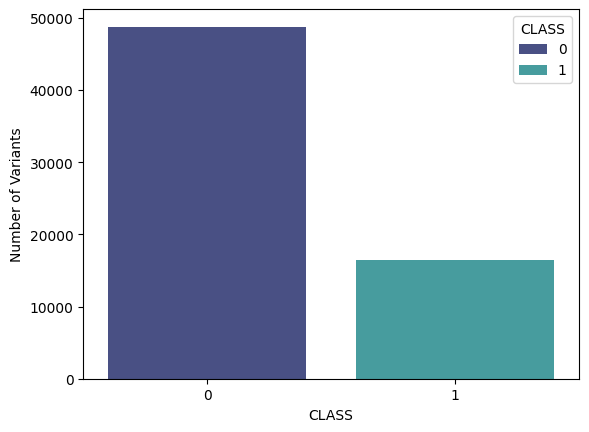

In [ ]:
# 0 means no conflict in genome , 1 means there is a conflict
ax = sns.countplot(x="CLASS", data=df,hue="CLASS",palette='mako')
ax.set(xlabel='CLASS', ylabel='Number of Variants');

In [ ]:
chrom_ct = pd.crosstab(df.SYMBOL, df.CLASS, margins=True)
chrom_ct

CLASS       0      1    All
SYMBOL                     
A2ML1      19      2     21
AAAS        1      1      2
AARS       27     14     41
AARS2      13      8     21
ABAT        6      5     11
...       ...    ...    ...
ZNF469     78     34    112
ZNF674      1      1      2
ZNF81       5      2      7
ZSWIM6      2      0      2
All     48749  16423  65172

[2329 rows x 3 columns]

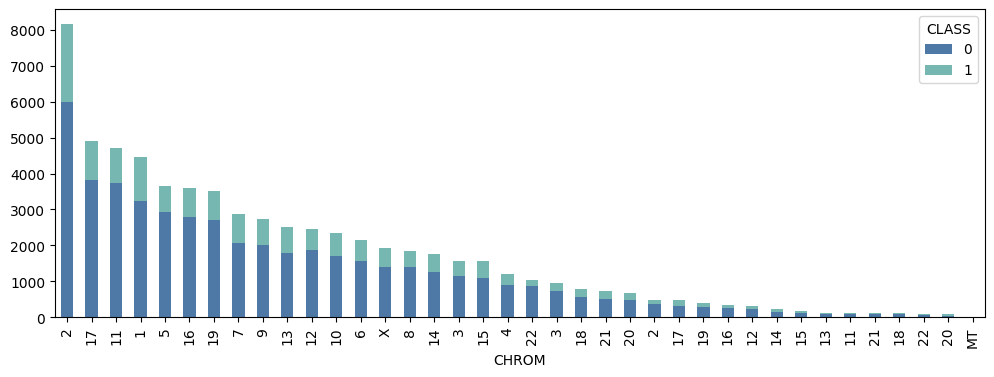

In [ ]:
chrom_ct = pd.crosstab(df.CHROM, df.CLASS, margins=True)
chrom_ct.drop('All', axis=0, inplace=True)

chrom_ct = chrom_ct.sort_values(by='All', ascending=False)
chrom_ct.drop('All', axis=1, inplace=True)

chrom_ct.plot.bar(stacked=True, figsize=(12, 4),color=['#4E79A7','#76B7B2']);

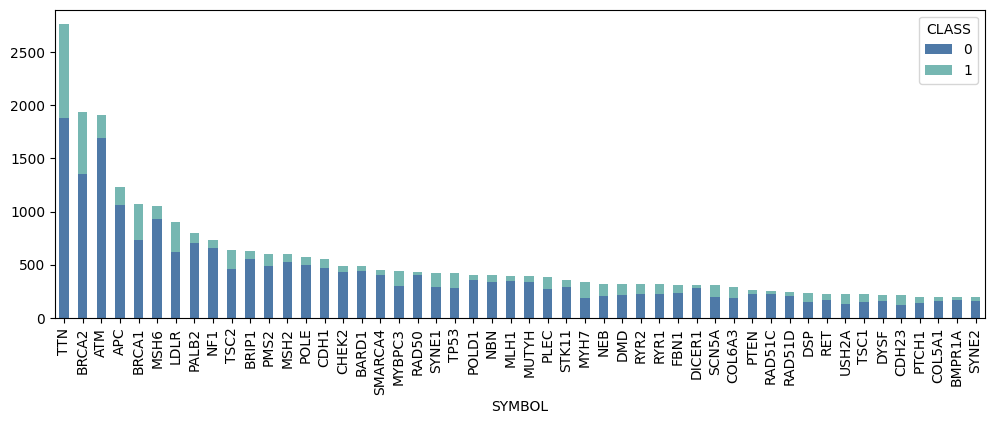

In [ ]:
gene_ct = pd.crosstab(df.SYMBOL, df.CLASS, margins=True)
gene_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
gene_ct = gene_ct.sort_values(by='All', ascending=False).head(50)
gene_ct.drop('All', axis=1, inplace=True)

gene_ct.plot.bar(stacked=True, figsize=(12, 4),color=['#4E79A7','#76B7B2']);

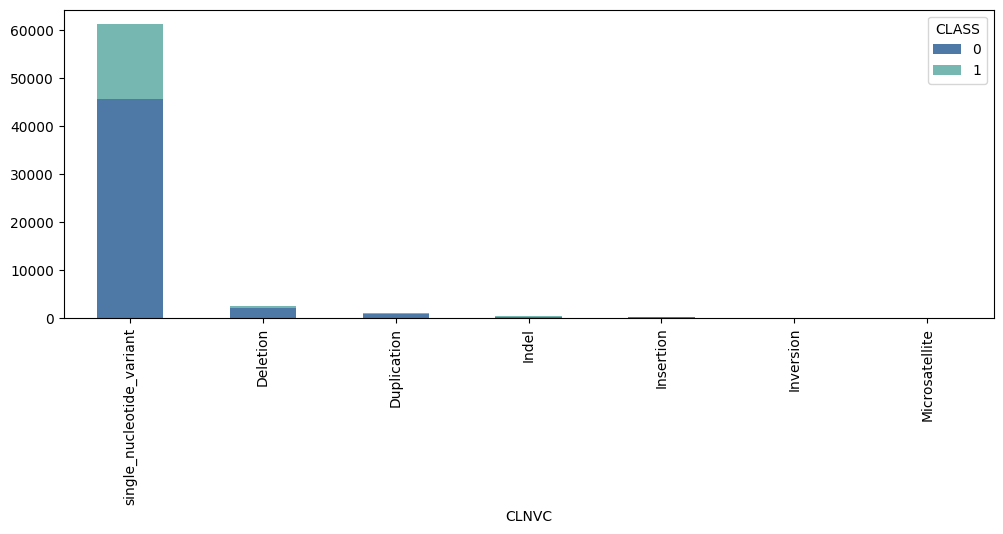

In [ ]:
vt_ct = pd.crosstab(df.CLNVC, df.CLASS, margins=True)
vt_ct.drop('All', axis=0, inplace=True)

vt_ct = vt_ct.sort_values(by='All', ascending=False)
vt_ct.drop('All', axis=1, inplace=True)

vt_ct.plot.bar(stacked=True, figsize=(12, 4),color=['#4E79A7','#76B7B2']);

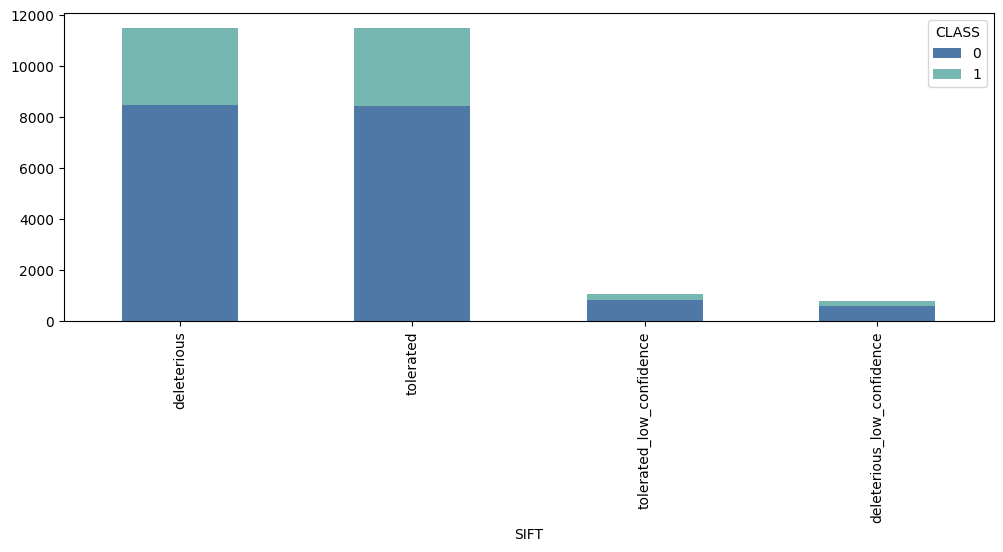

In [ ]:
sift_ct = pd.crosstab(df.SIFT, df.CLASS, margins=True)
sift_ct.drop('All', axis=0, inplace=True)

sift_ct = sift_ct.sort_values(by='All', ascending=False)
sift_ct.drop('All', axis=1, inplace=True)

sift_ct.plot.bar(stacked=True, figsize=(12, 4),color=['#4E79A7','#76B7B2']);

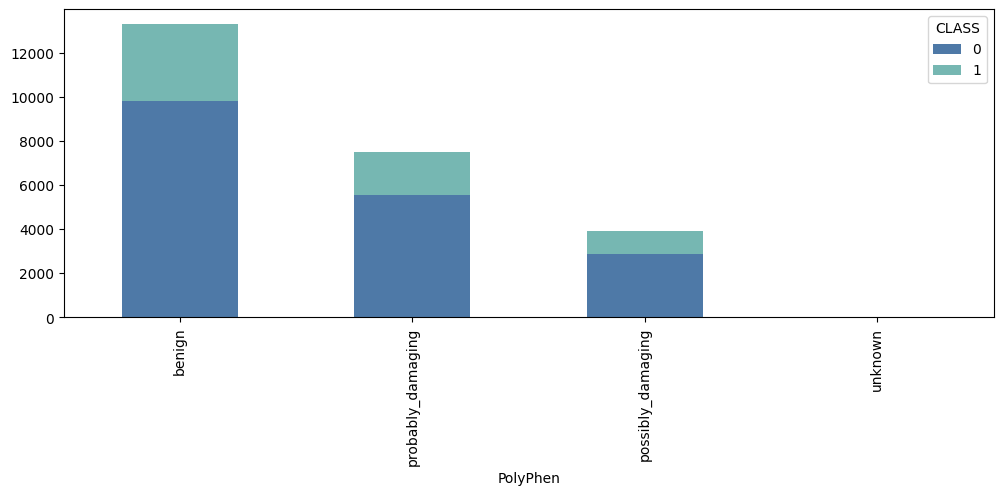

In [ ]:
pp_ct = pd.crosstab(df.PolyPhen, df.CLASS, margins=True)
pp_ct.drop('All', axis=0, inplace=True)

pp_ct = pp_ct.sort_values(by='All', ascending=False)
pp_ct.drop('All', axis=1, inplace=True)

pp_ct.plot.bar(stacked=True, figsize=(12, 4),color=['#4E79A7','#76B7B2']);

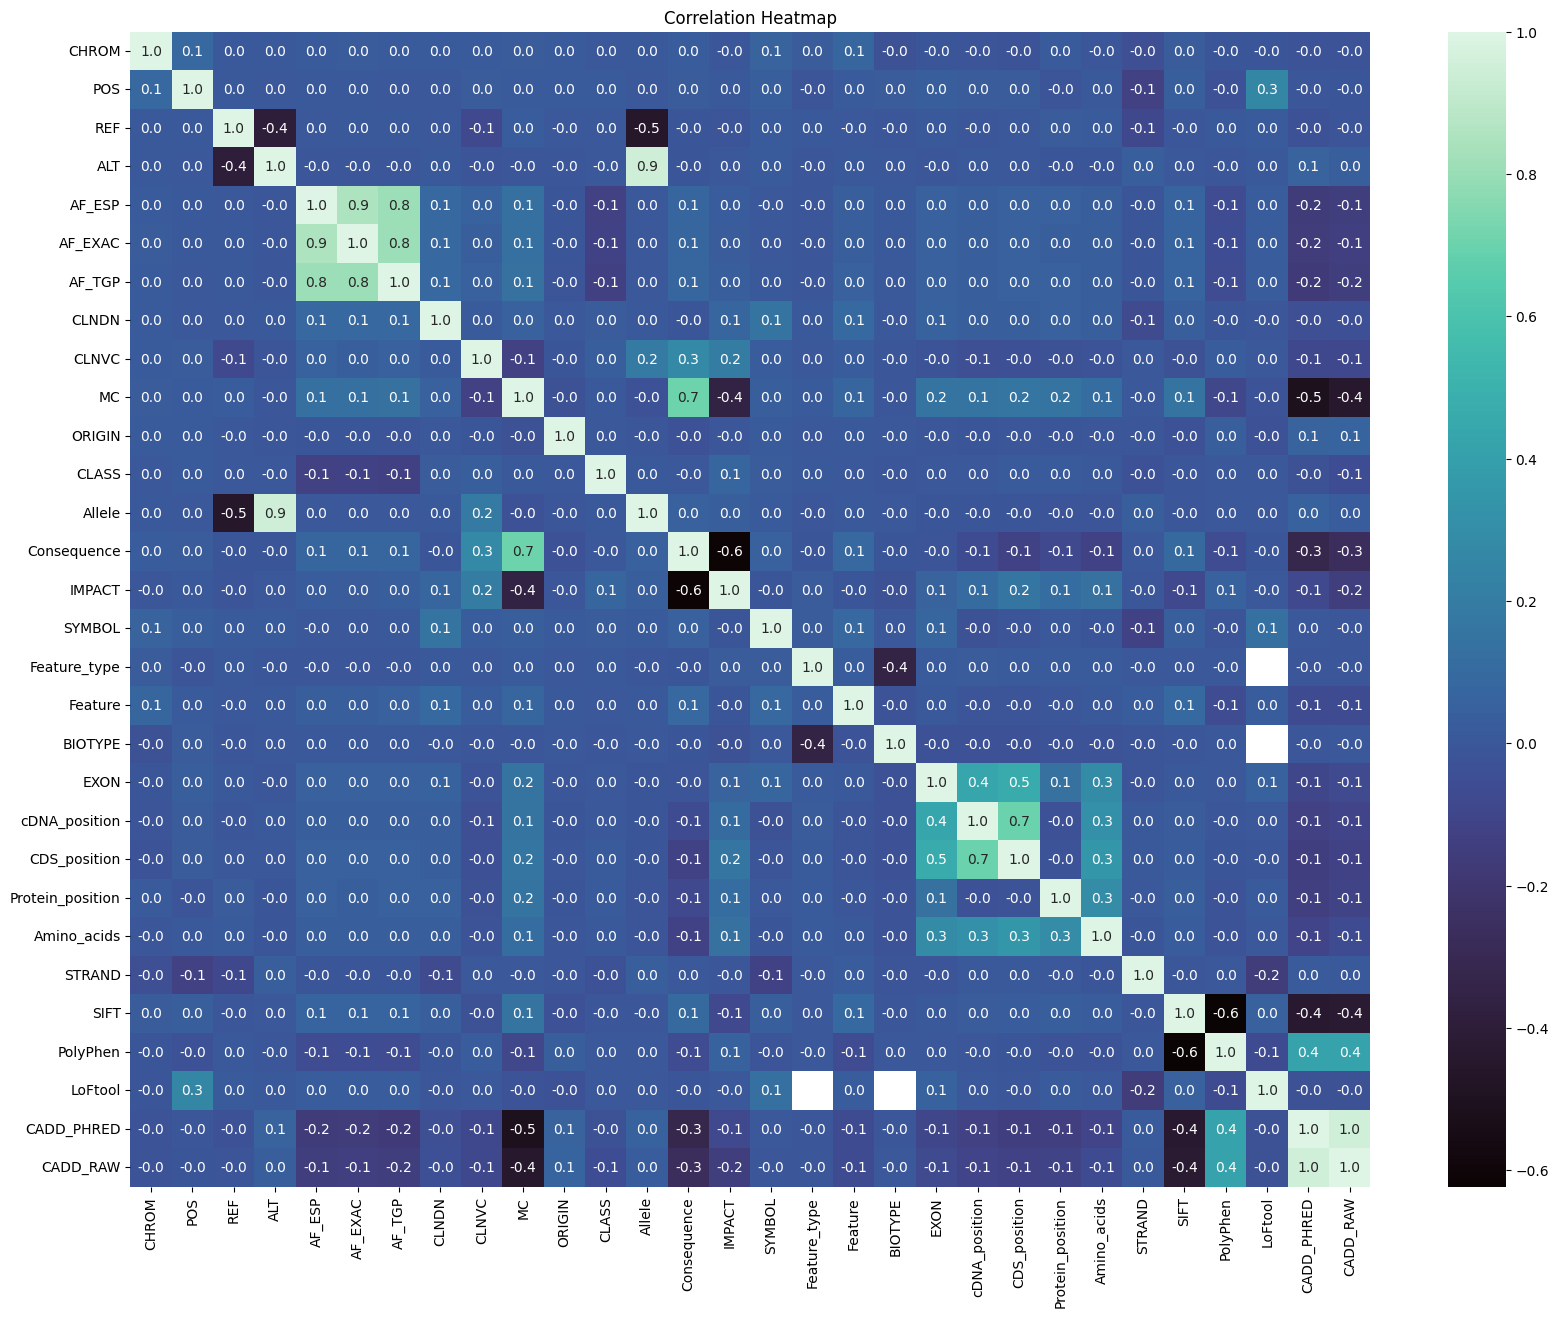

In [ ]:
# Create a heatmap
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
sns.heatmap(df_num.corr(), annot=True, cmap='mako', fmt=".1f")
# 'annot=True' to display the correlation values, 'cmap' for color mapping, 'fmt' to format the annotations
plt.title('Correlation Heatmap')  # Set the title
plt.show()

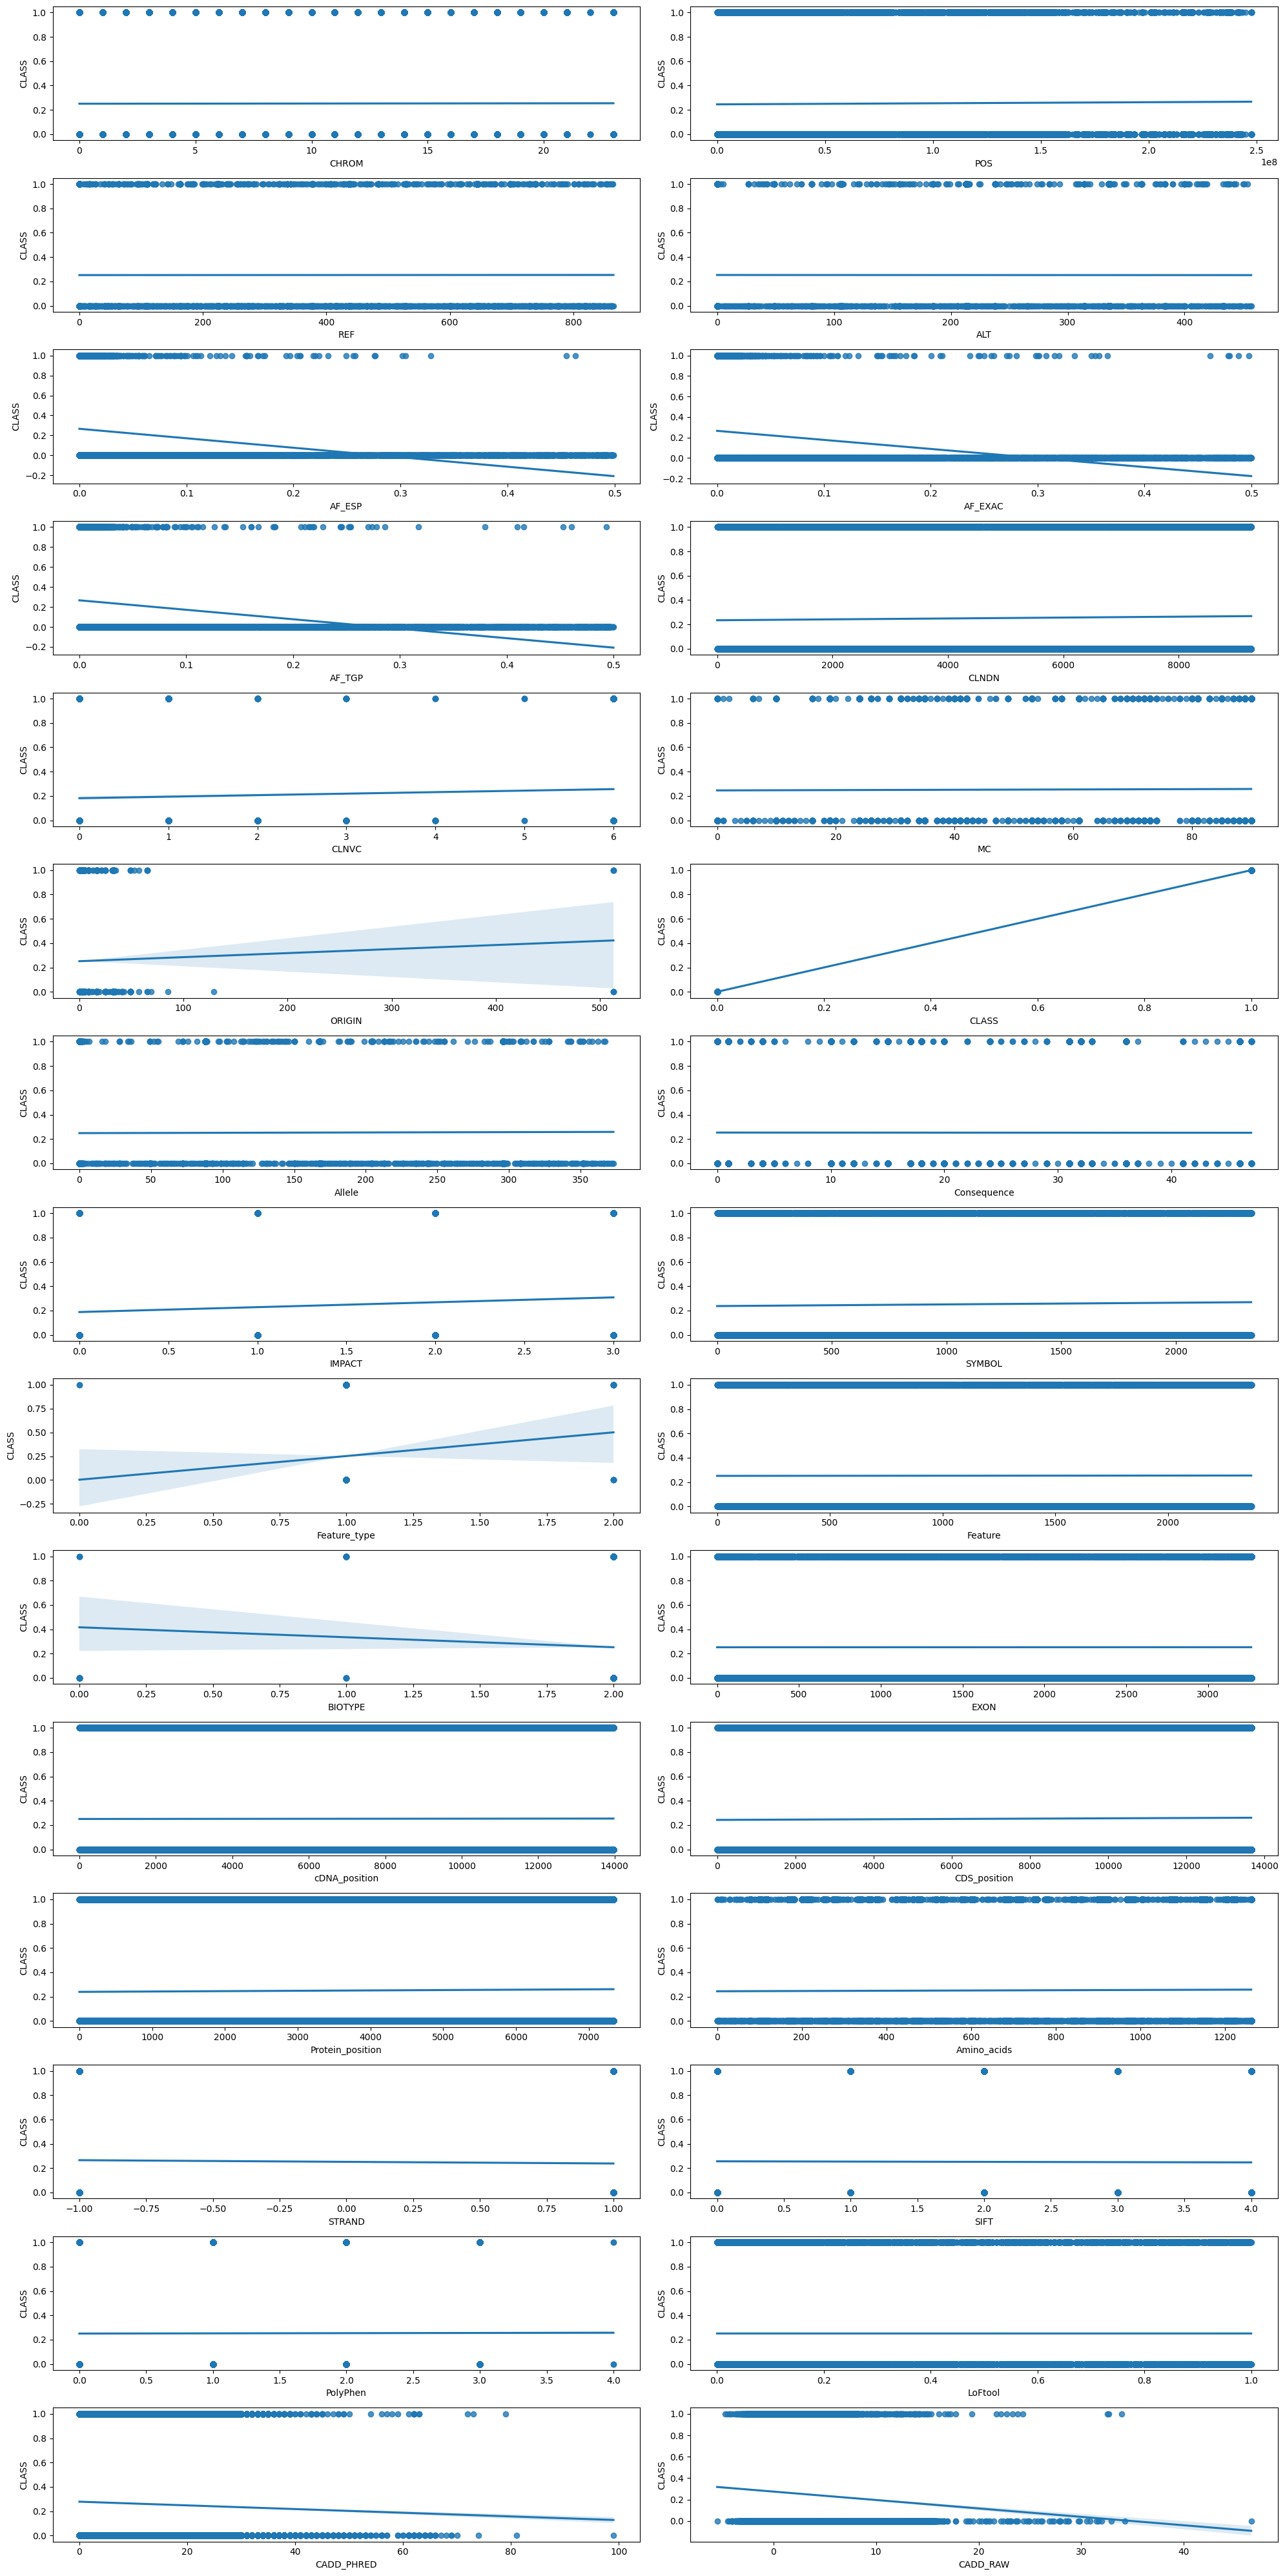

In [ ]:
plt.figure(figsize=(20,40))
plot_num = 1
for col in df_num:
    plt.subplot(15,2,plot_num)
    sns.regplot(x=df_num[col],y="CLASS",data=df)
    plot_num += 1
    plt.tight_layout()


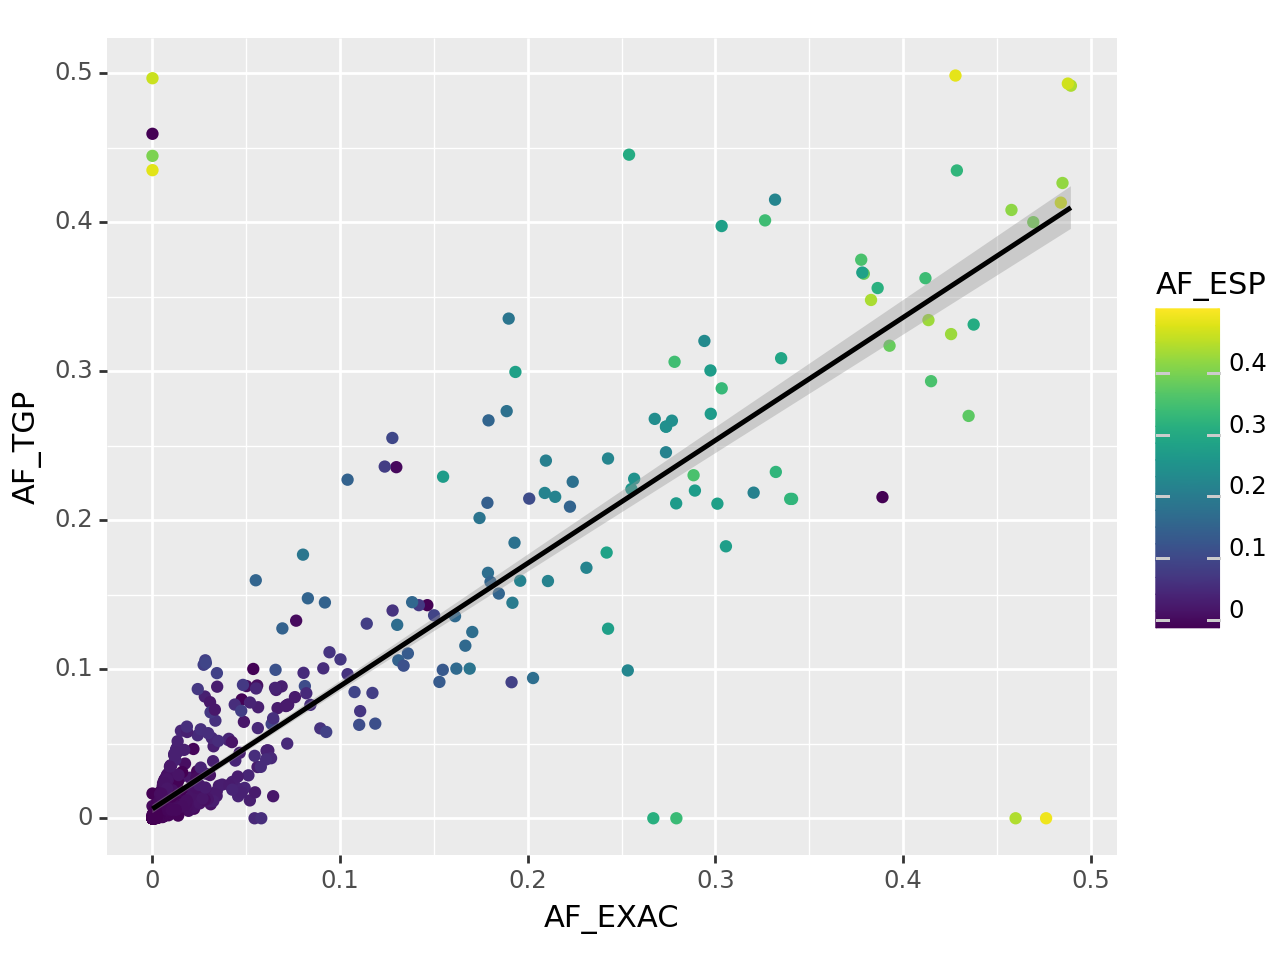

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *
GD = df.head(1000)
(
    ggplot(GD)
    + aes(x='AF_EXAC', y='AF_TGP', color='AF_ESP')  # Specify color mapping for AF_ESP
    + geom_point()  # Add points
    + stat_smooth()  # Add smooth trendline
)


# **Line Plots**

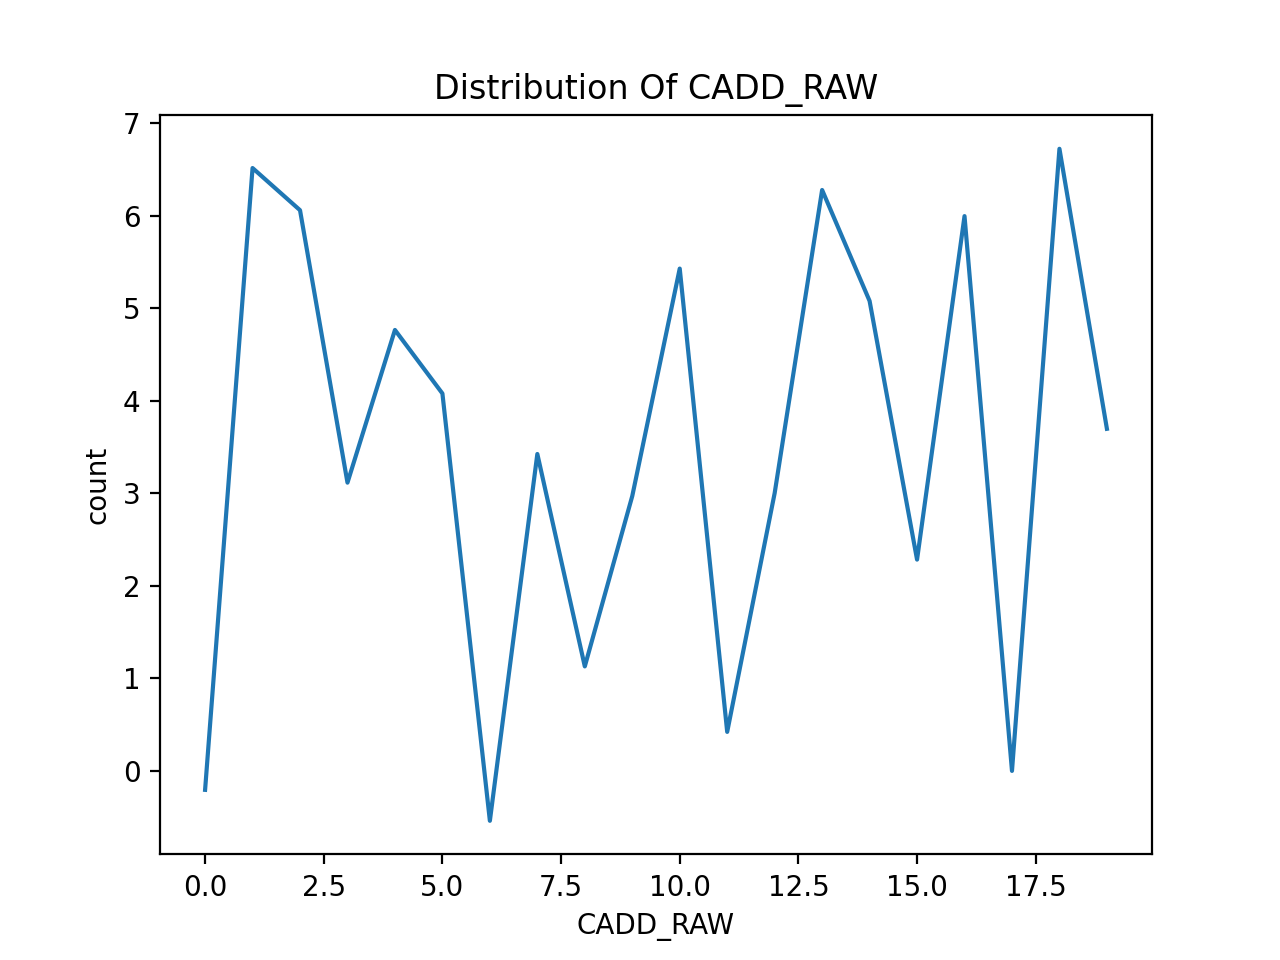

In [ ]:
df.CADD_RAW.head(20).plot(kind='line')

plt.title('Distribution Of CADD_RAW')
plt.ylabel('count')
plt.xlabel('CADD_RAW')

plt.show()

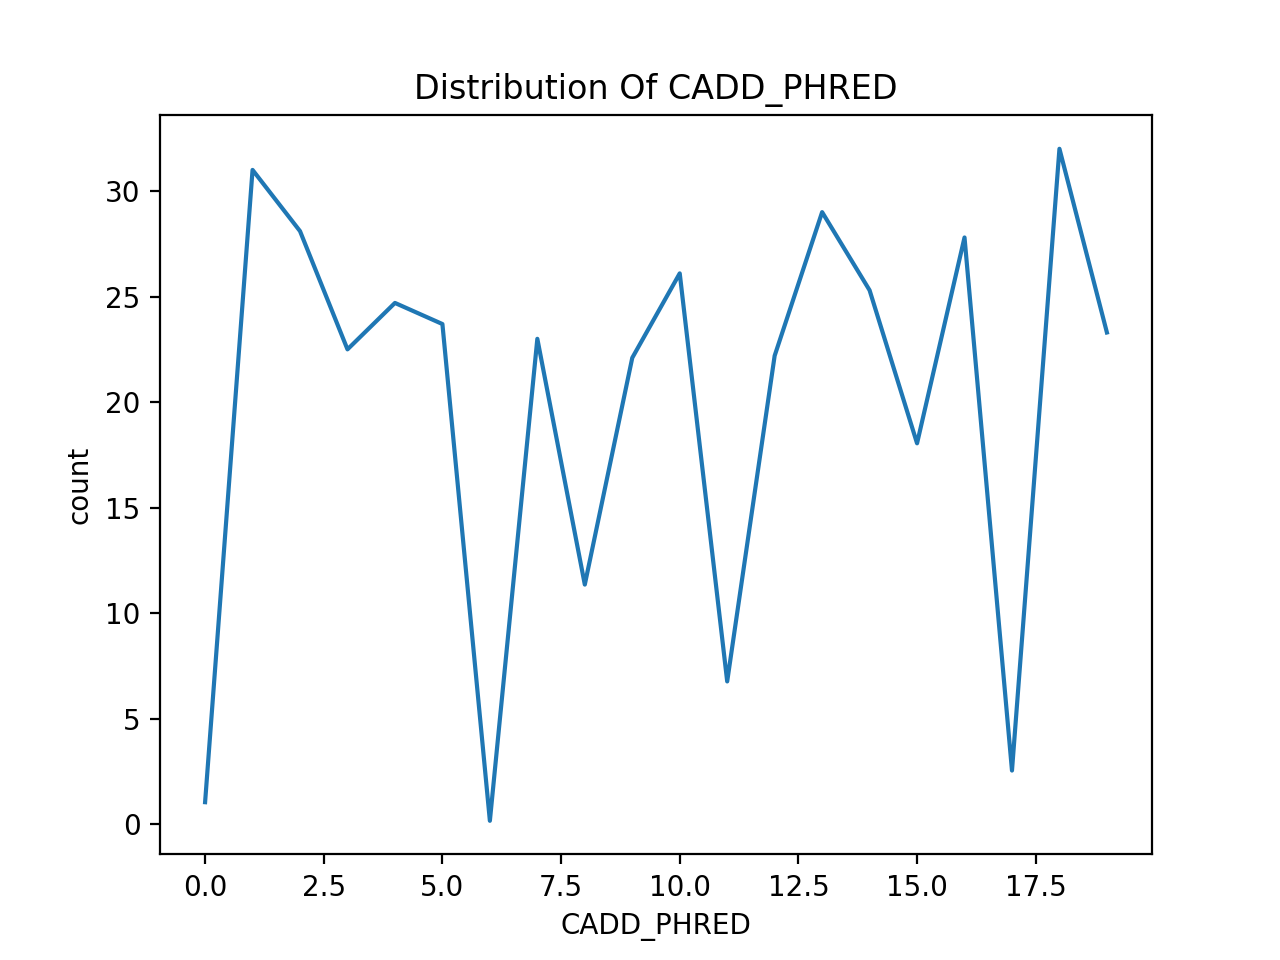

In [ ]:
df.CADD_PHRED.head(20).plot(kind='line')

plt.title('Distribution Of CADD_PHRED')
plt.ylabel('count')
plt.xlabel('CADD_PHRED')

plt.show()

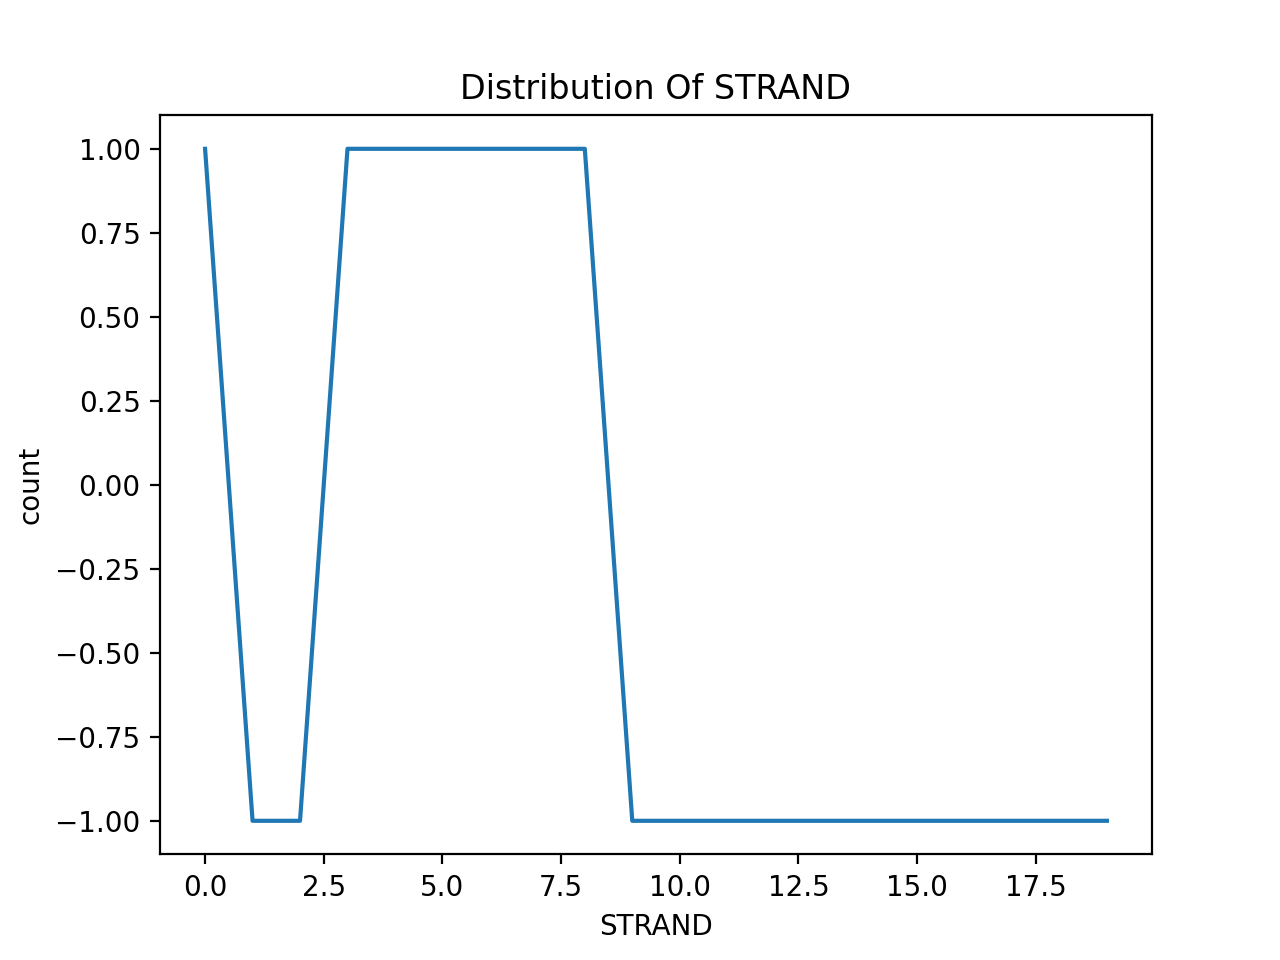

In [ ]:
df.STRAND.head(20).plot(kind='line')

plt.title('Distribution Of STRAND')
plt.ylabel('count')
plt.xlabel('STRAND')

plt.show()

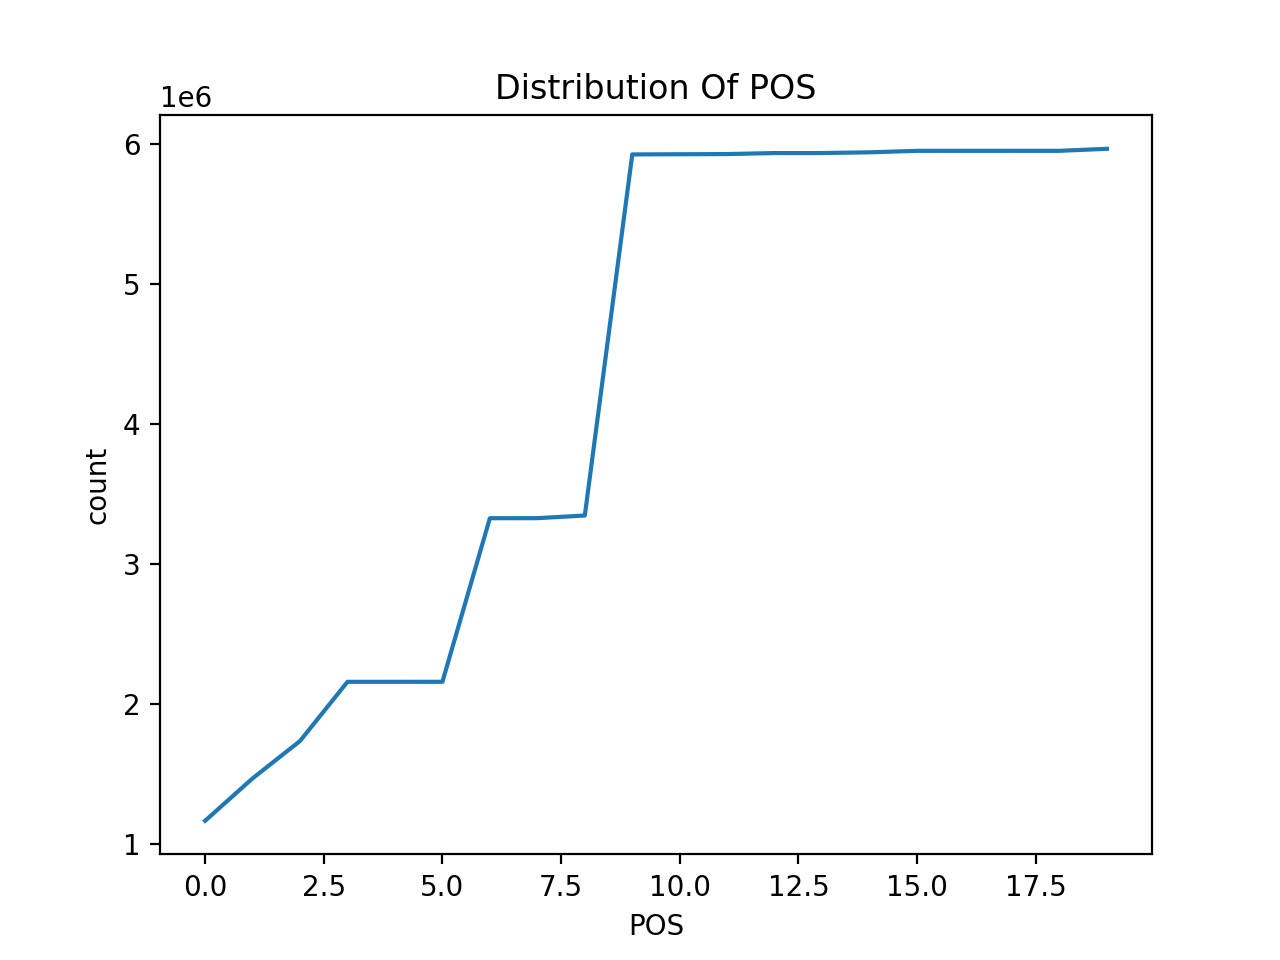

In [ ]:
df.POS.head(20).plot(kind='line')

plt.title('Distribution Of POS')
plt.ylabel('count')
plt.xlabel('POS')

plt.show()

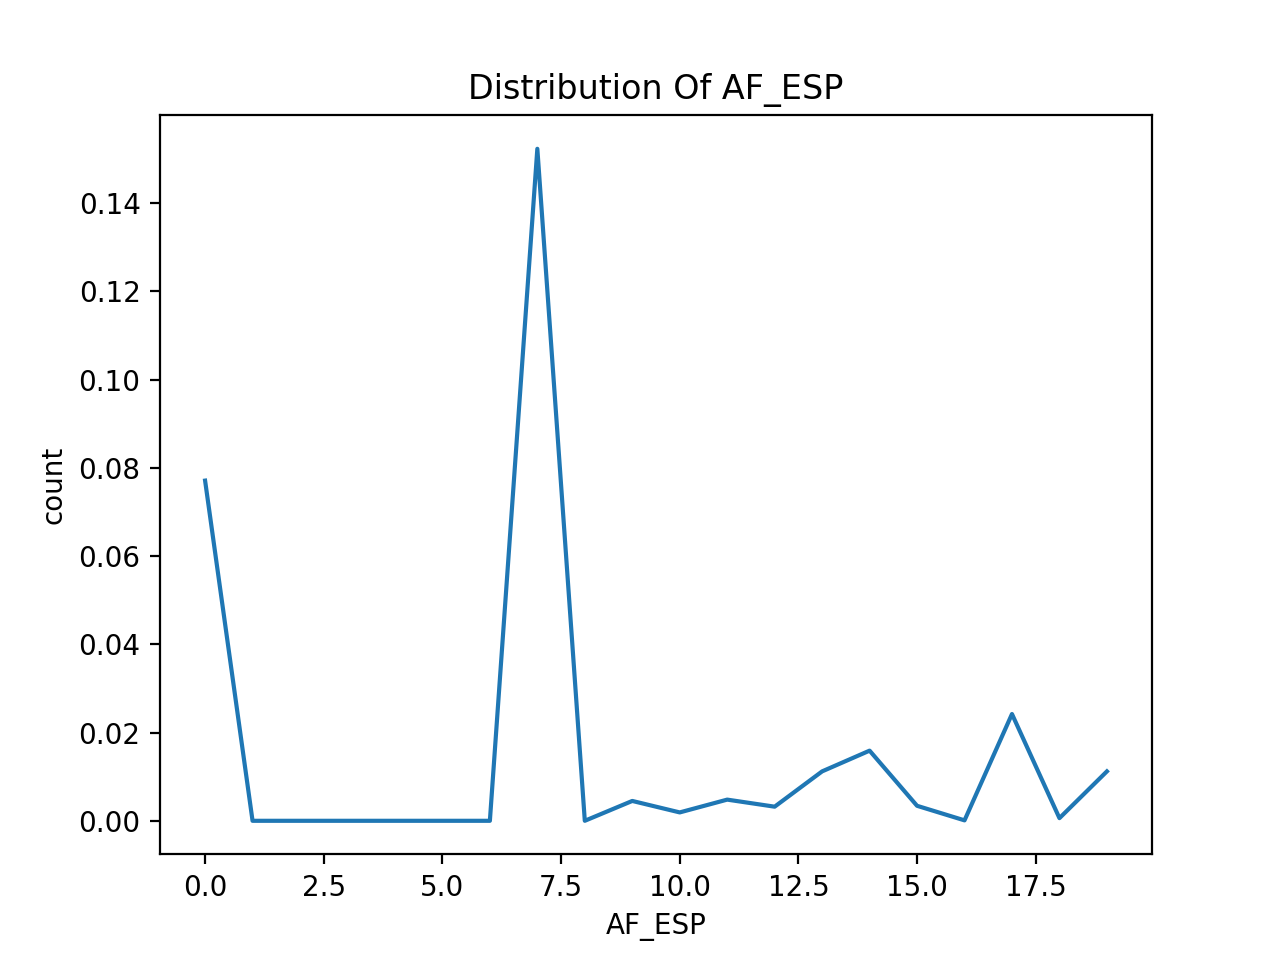

In [ ]:
df.AF_ESP.head(20).plot(kind='line')

plt.title('Distribution Of AF_ESP')
plt.ylabel('count')
plt.xlabel('AF_ESP')

plt.show()

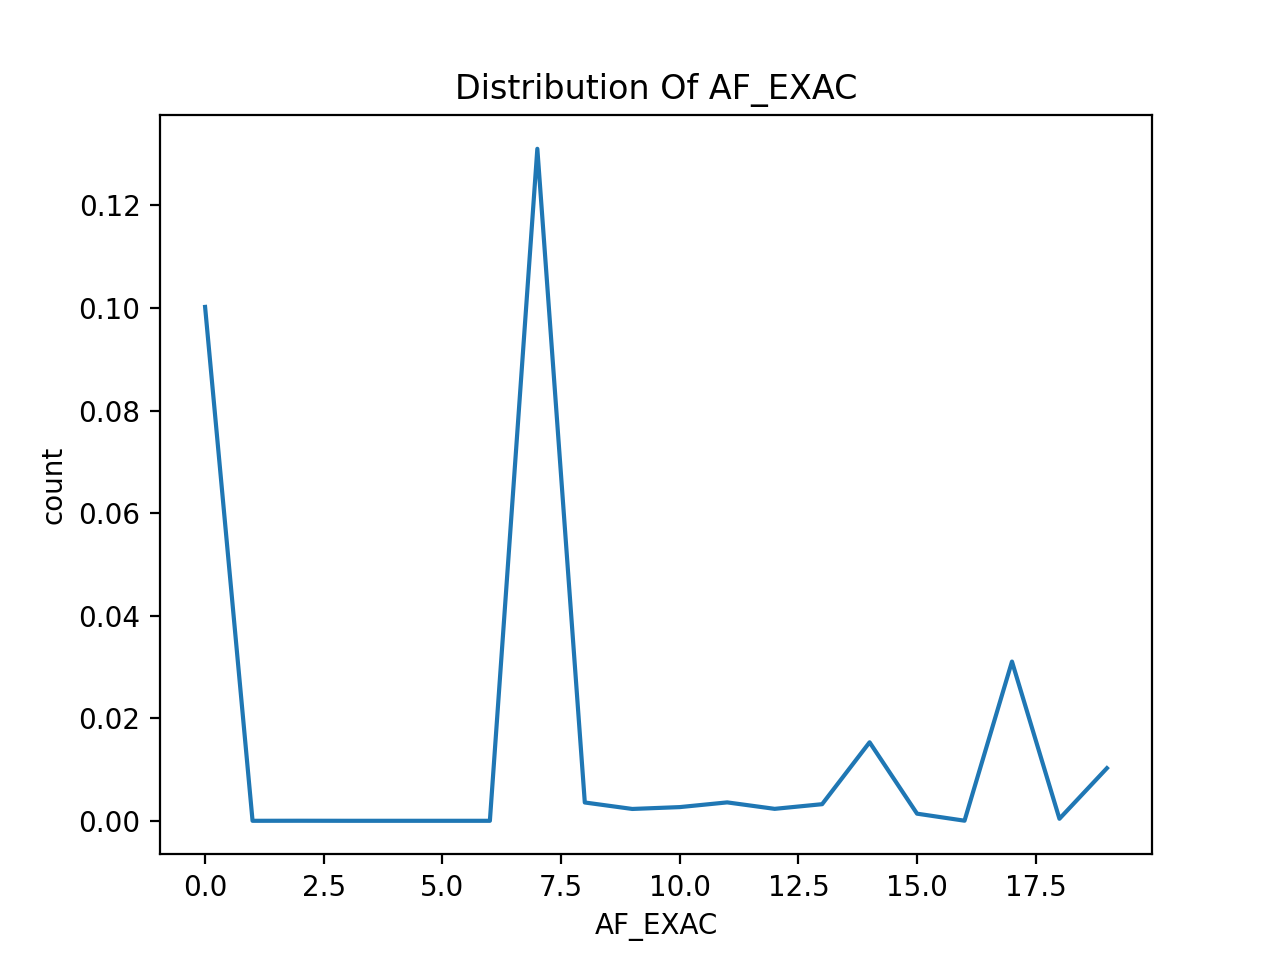

In [ ]:
df.AF_EXAC.head(20).plot(kind='line')

plt.title('Distribution Of AF_EXAC')
plt.ylabel('count')
plt.xlabel('AF_EXAC')

plt.show()

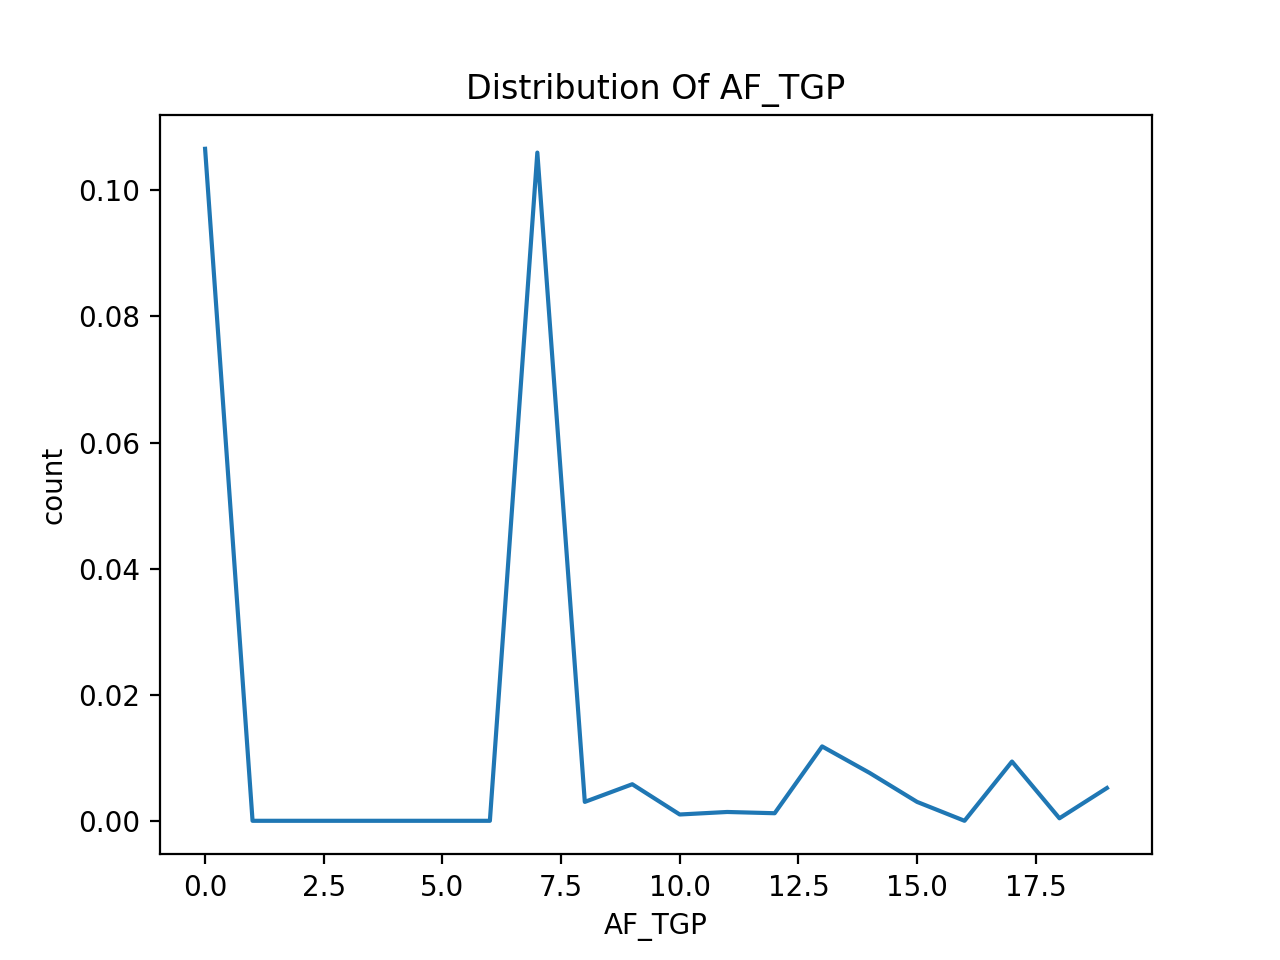

In [ ]:
df.AF_TGP.head(20).plot(kind='line')

plt.title('Distribution Of AF_TGP')
plt.ylabel('count')
plt.xlabel('AF_TGP')

plt.show()

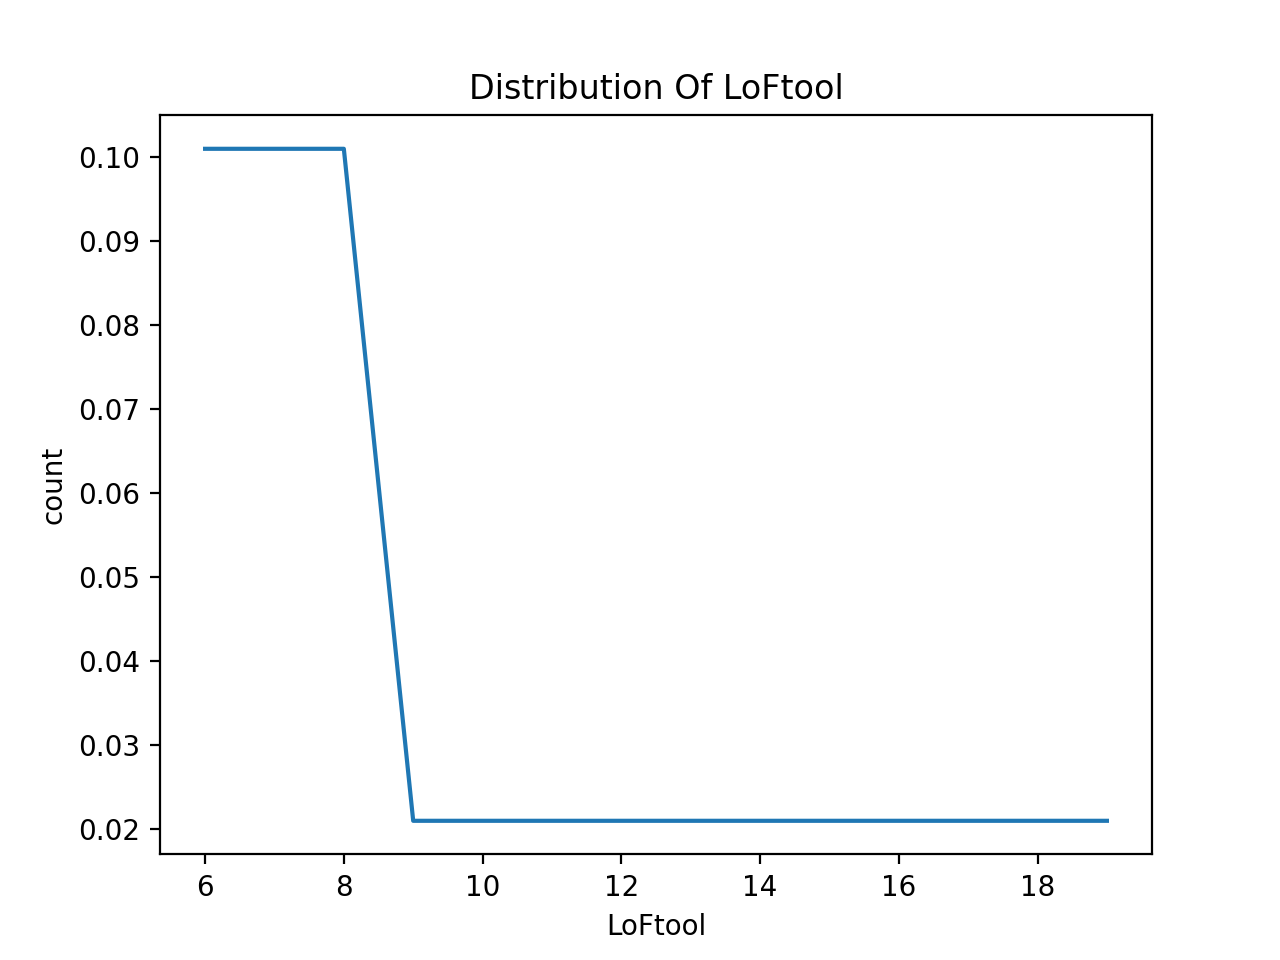

In [ ]:
df.LoFtool.head(20).plot(kind='line')

plt.title('Distribution Of LoFtool')
plt.ylabel('count')
plt.xlabel('LoFtool')

plt.show()

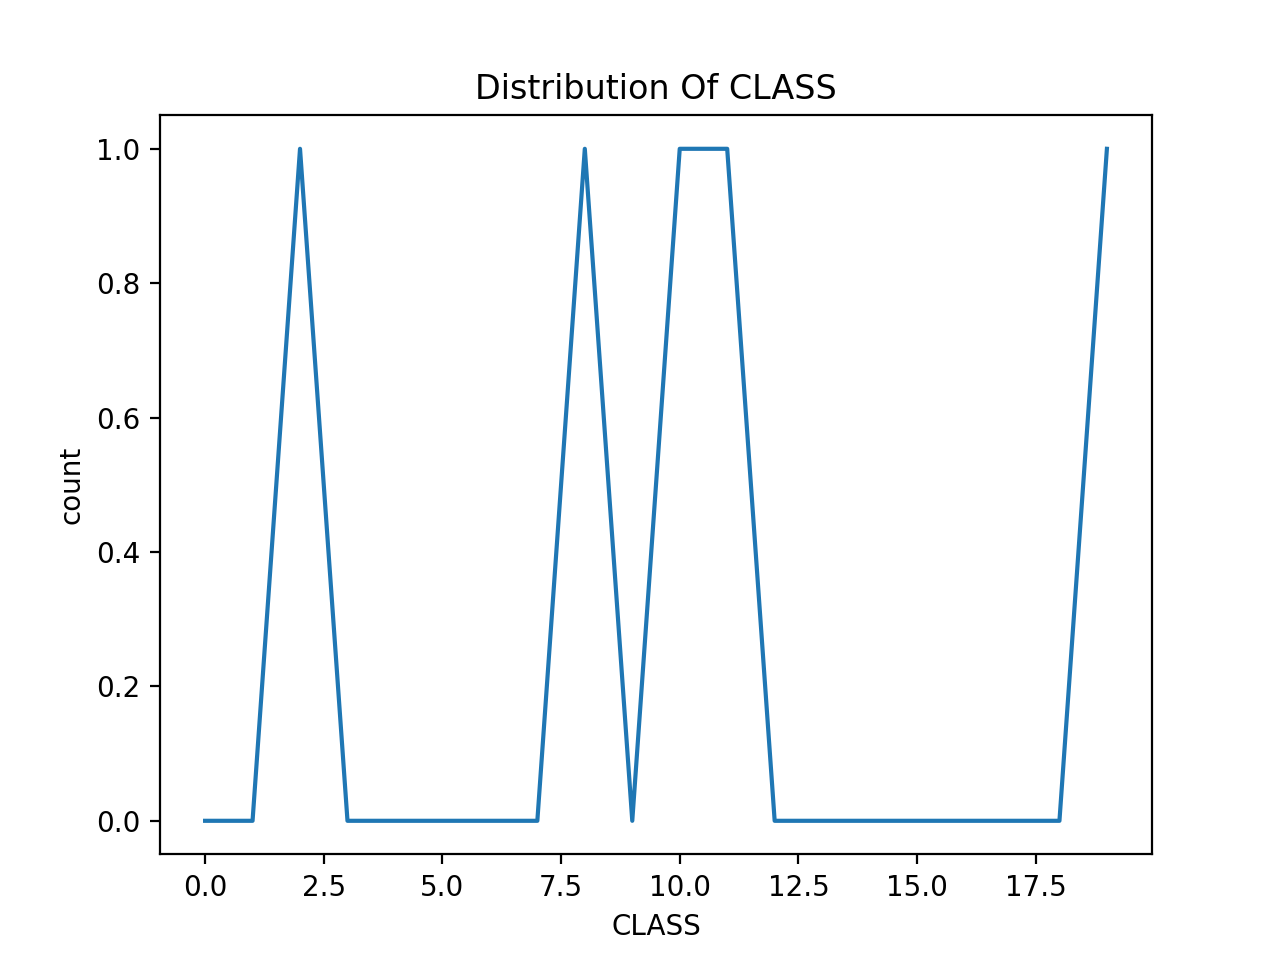

In [ ]:
df.CLASS.head(20).plot(kind='line')

plt.title('Distribution Of CLASS')
plt.ylabel('count')
plt.xlabel('CLASS')

plt.show()

# **Area Plots**

Text(0.5, 0, 'POS')

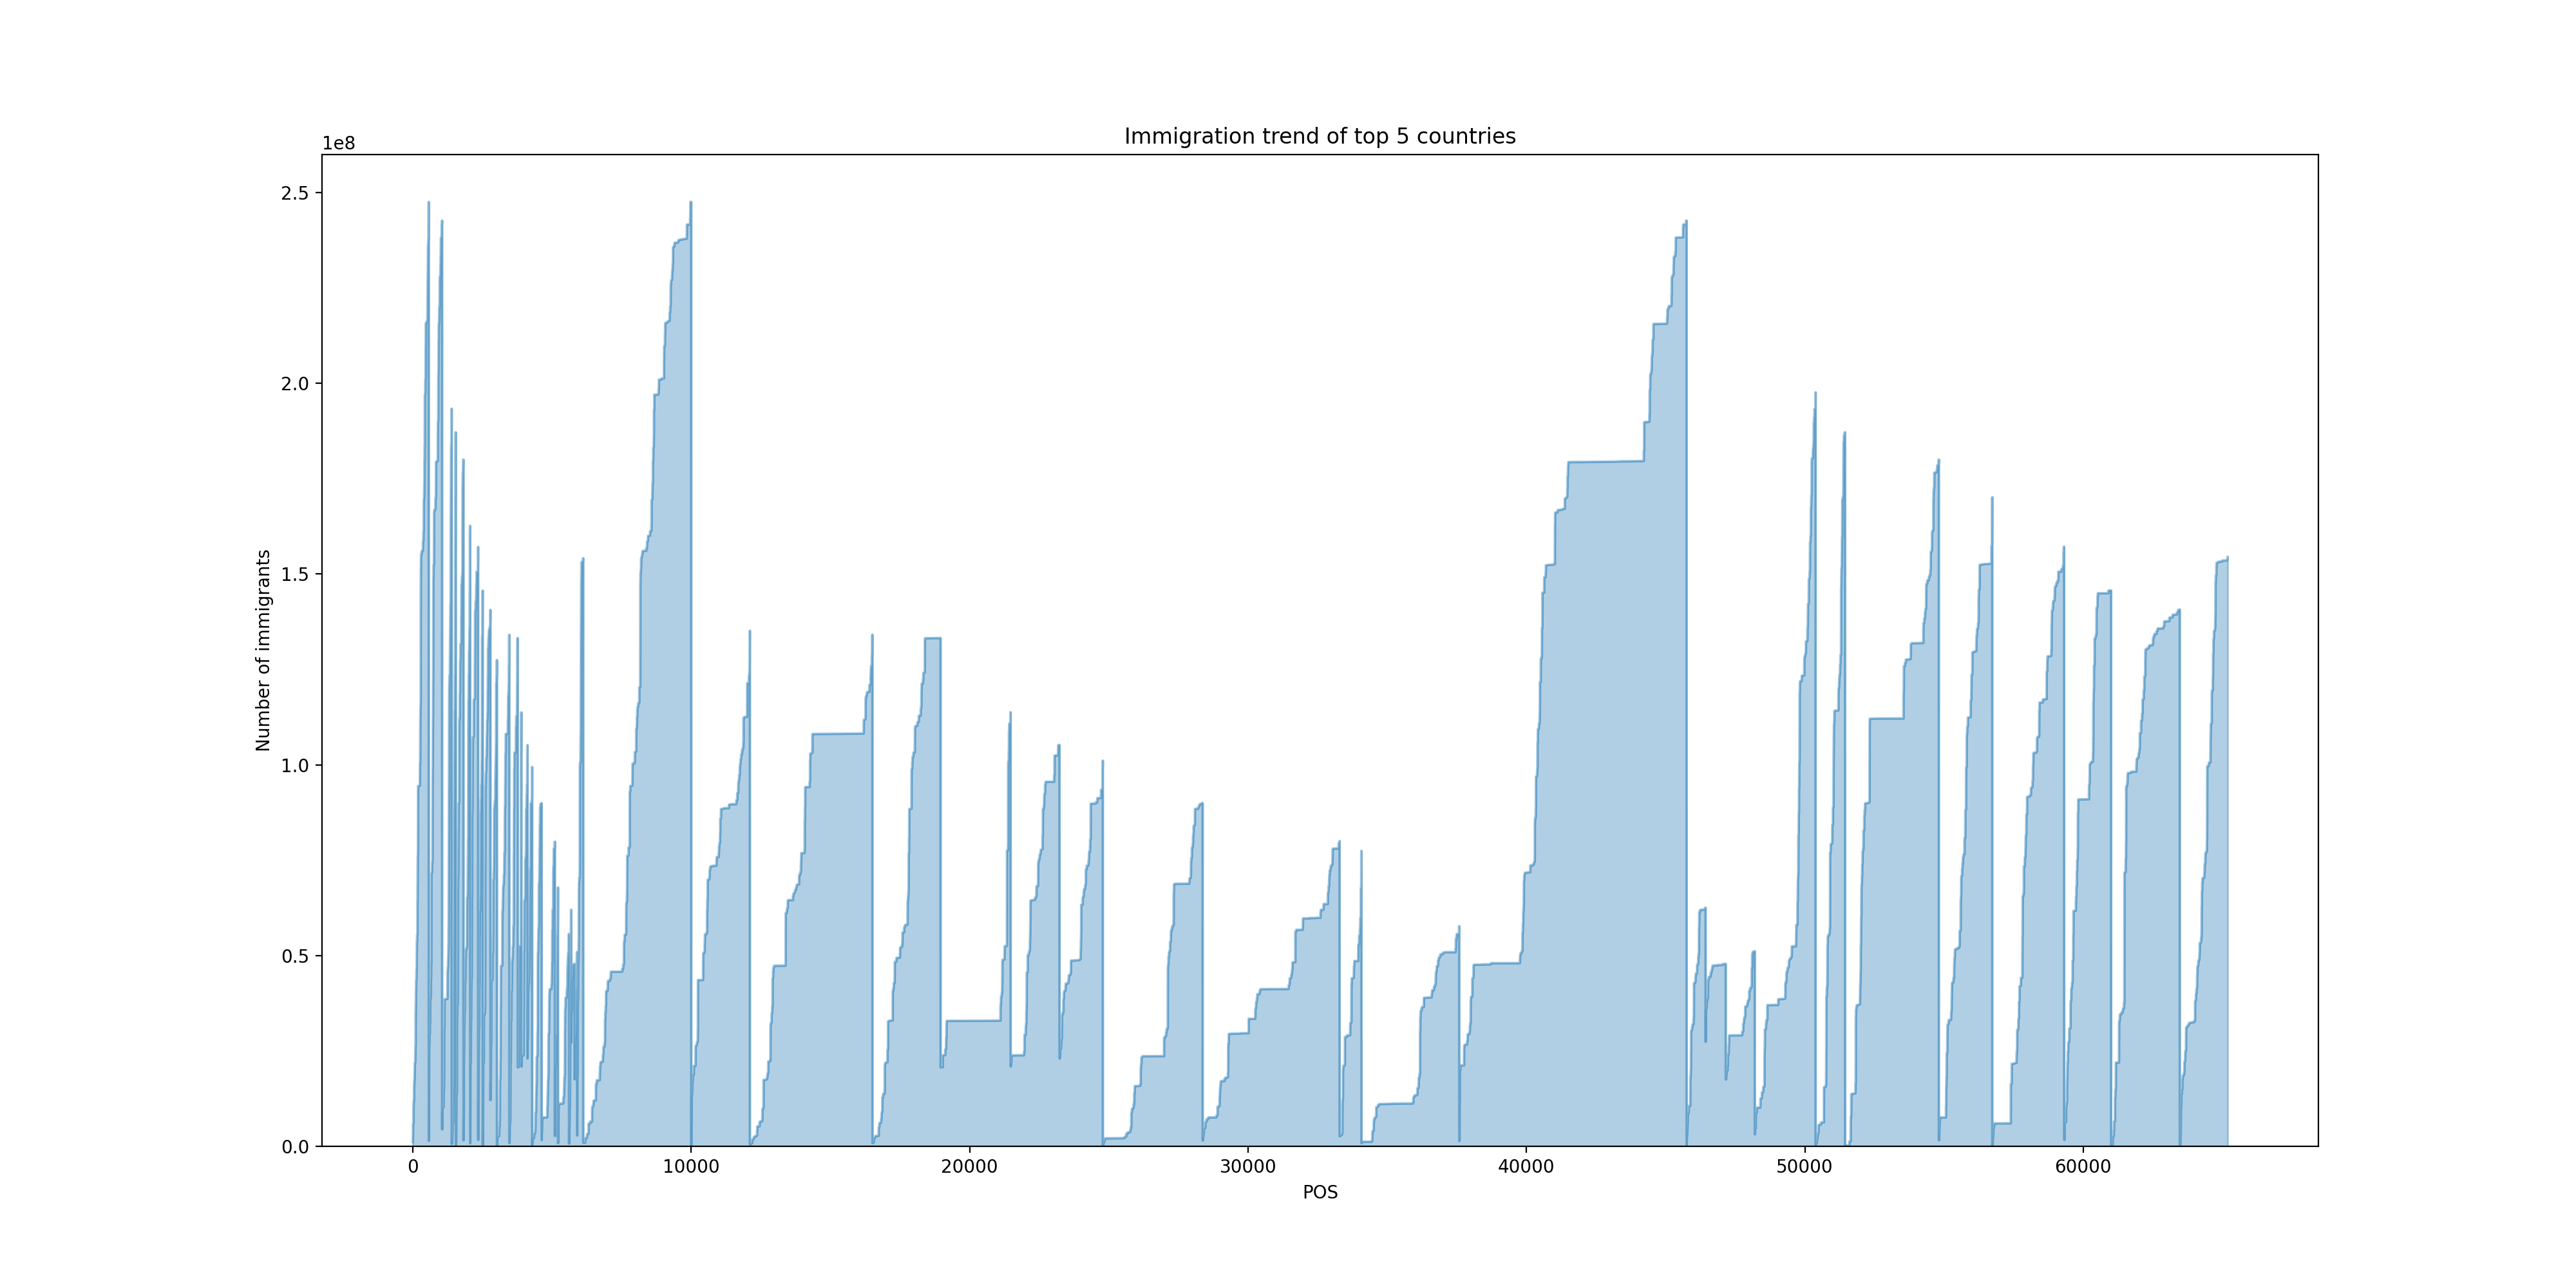

In [ ]:
df.POS.plot(kind='area', alpha=0.35, figsize=(20, 10))
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('POS')

# **Histogram**

In [ ]:
df['AF_TGP'].head()

0    0.1066
1    0.0000
2    0.0000
3    0.0000
4    0.0000
Name: AF_TGP, dtype: float64

In [ ]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['AF_TGP'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[60932  1298   669   472   473   339   268   255   247   235]
[0.      0.04998 0.09996 0.14994 0.19992 0.2499  0.29988 0.34986 0.39984
 0.44982 0.4998 ]


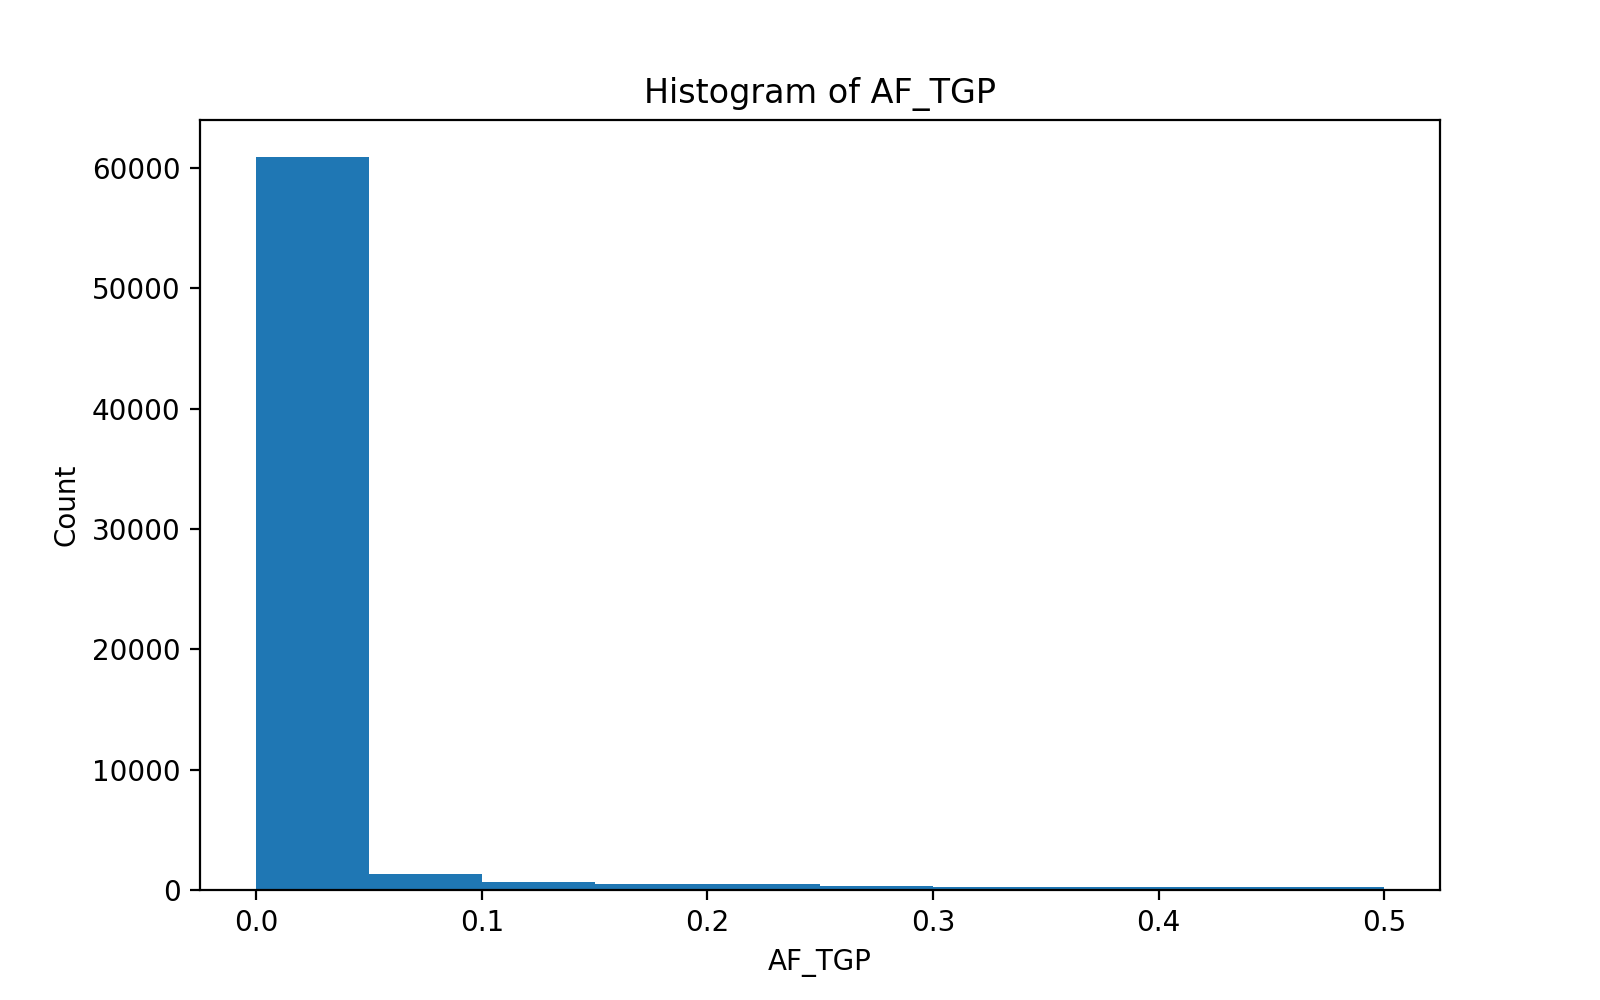

In [ ]:
df['AF_TGP'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of AF_TGP')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('AF_TGP')

plt.show()

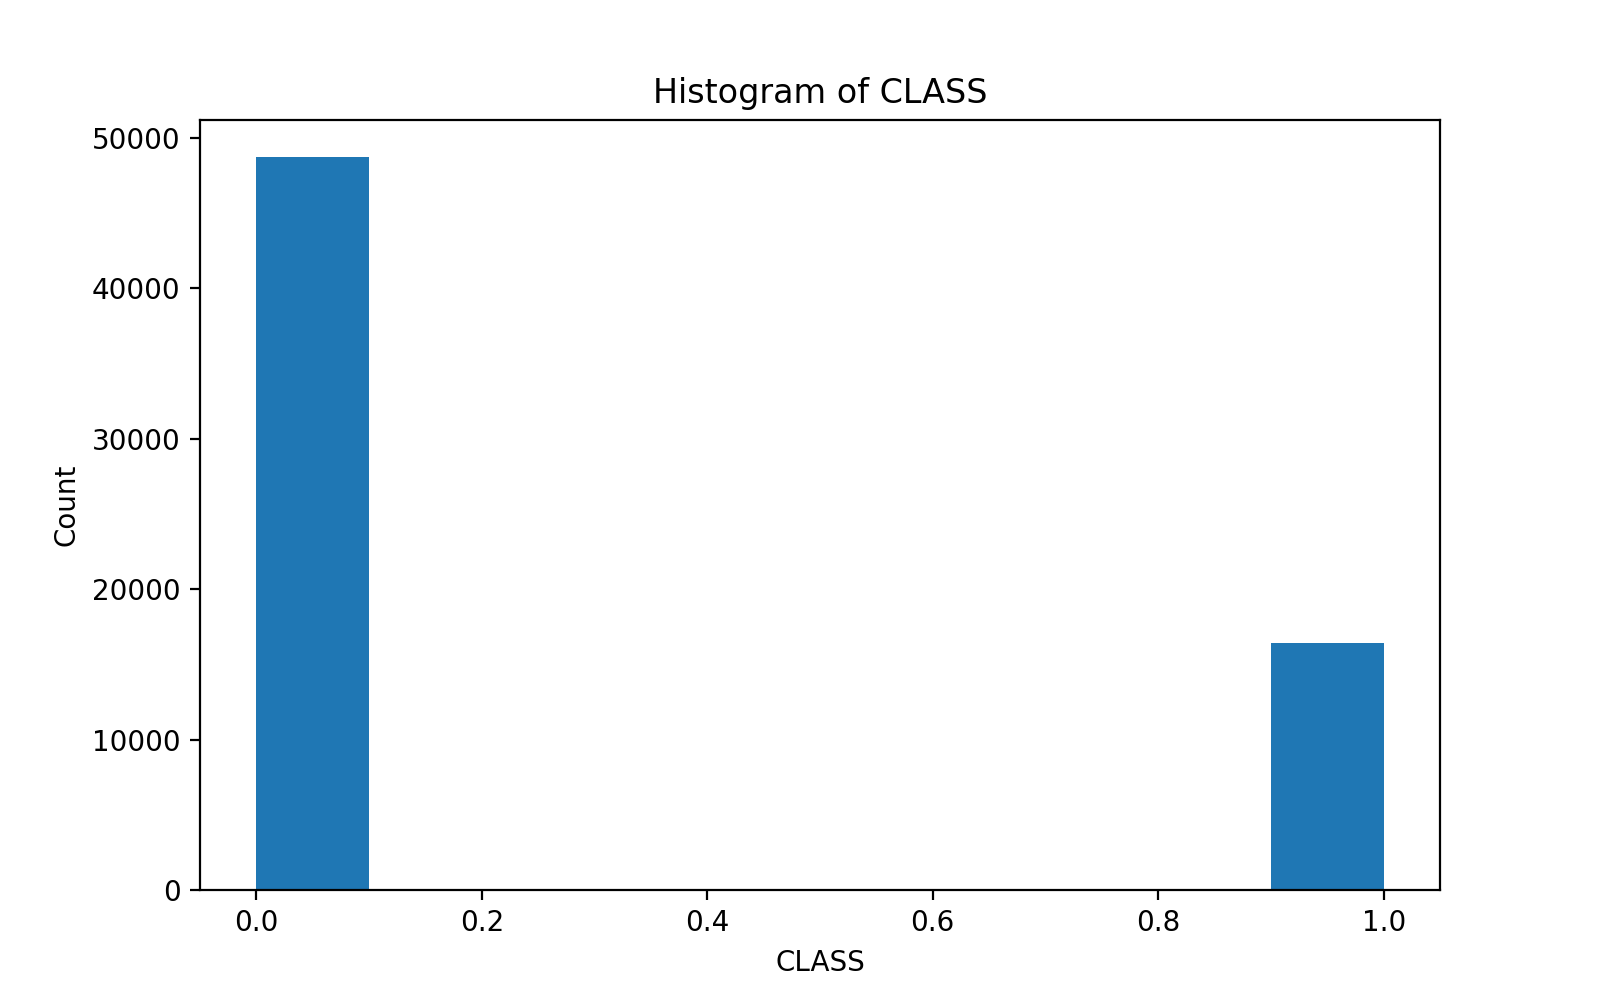

In [ ]:
df['CLASS'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of CLASS')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('CLASS')

plt.show()

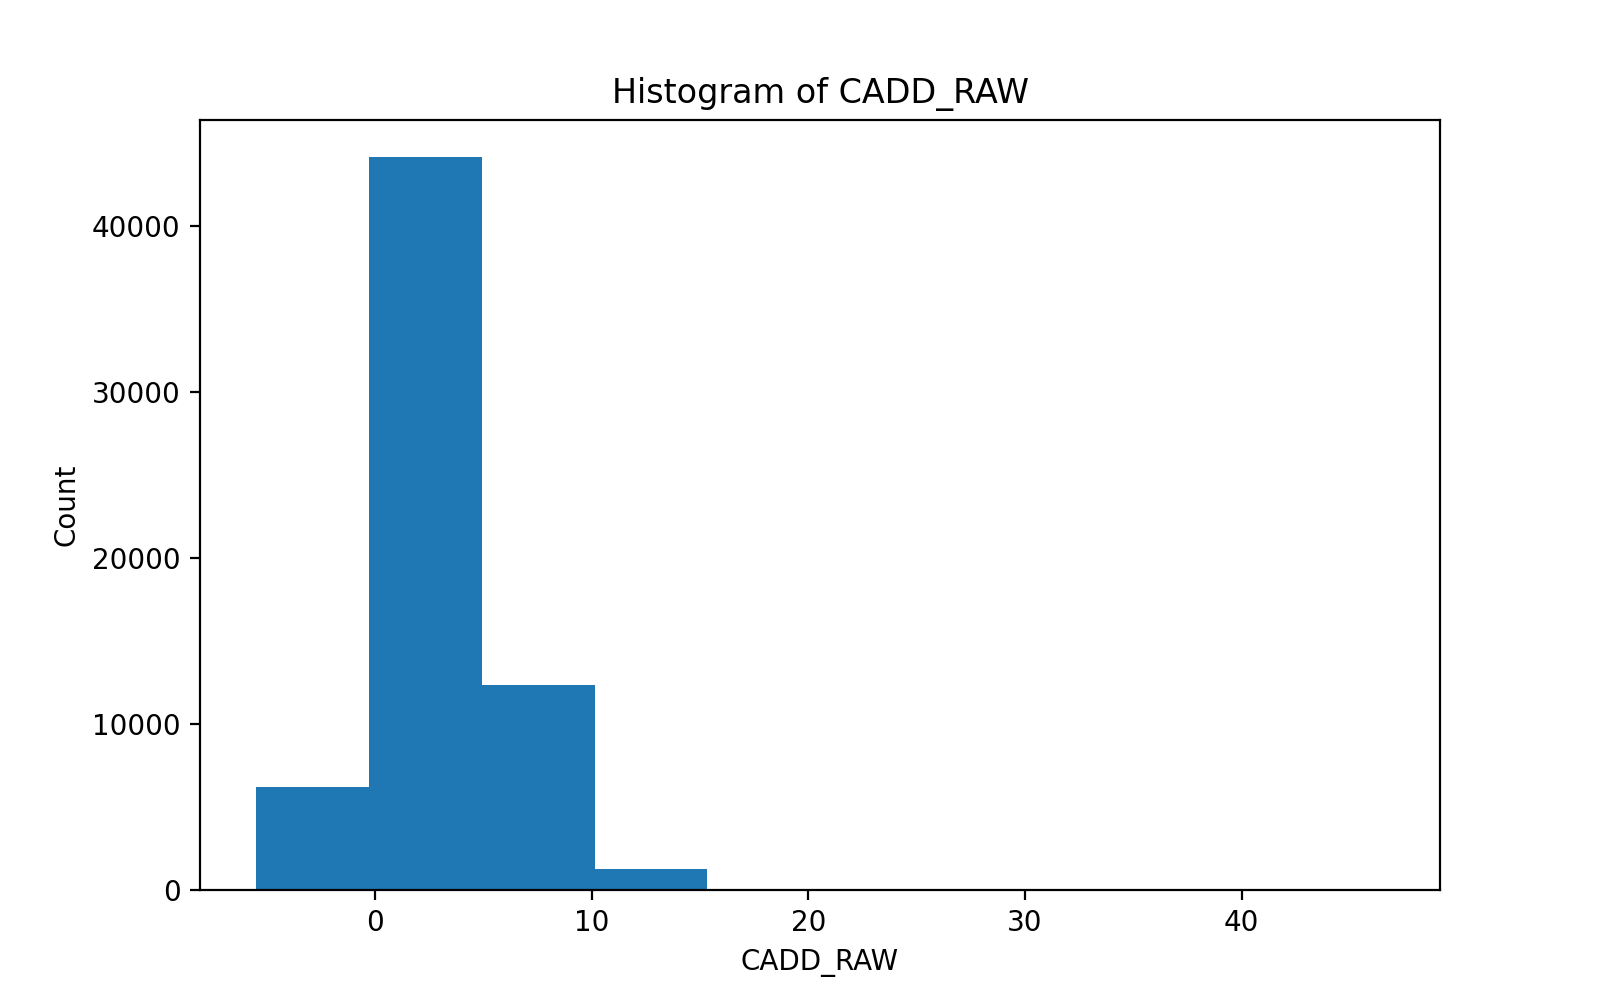

In [ ]:
df['CADD_RAW'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of CADD_RAW')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('CADD_RAW')

plt.show()

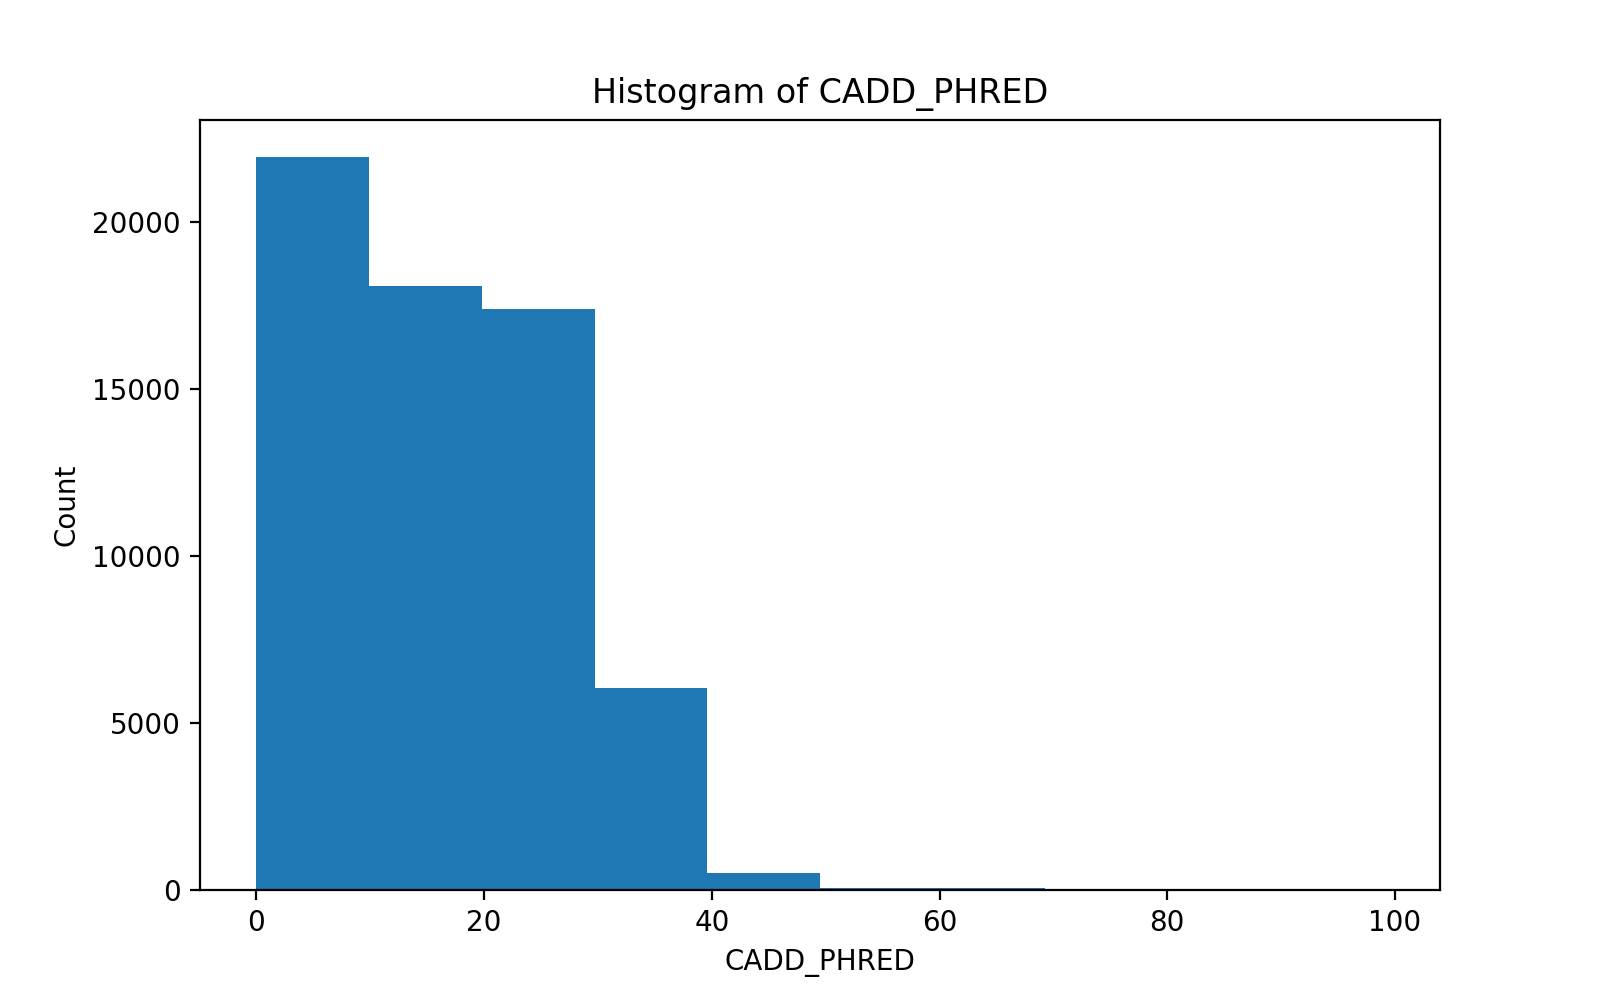

In [ ]:
df['CADD_PHRED'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of CADD_PHRED')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('CADD_PHRED')

plt.show()

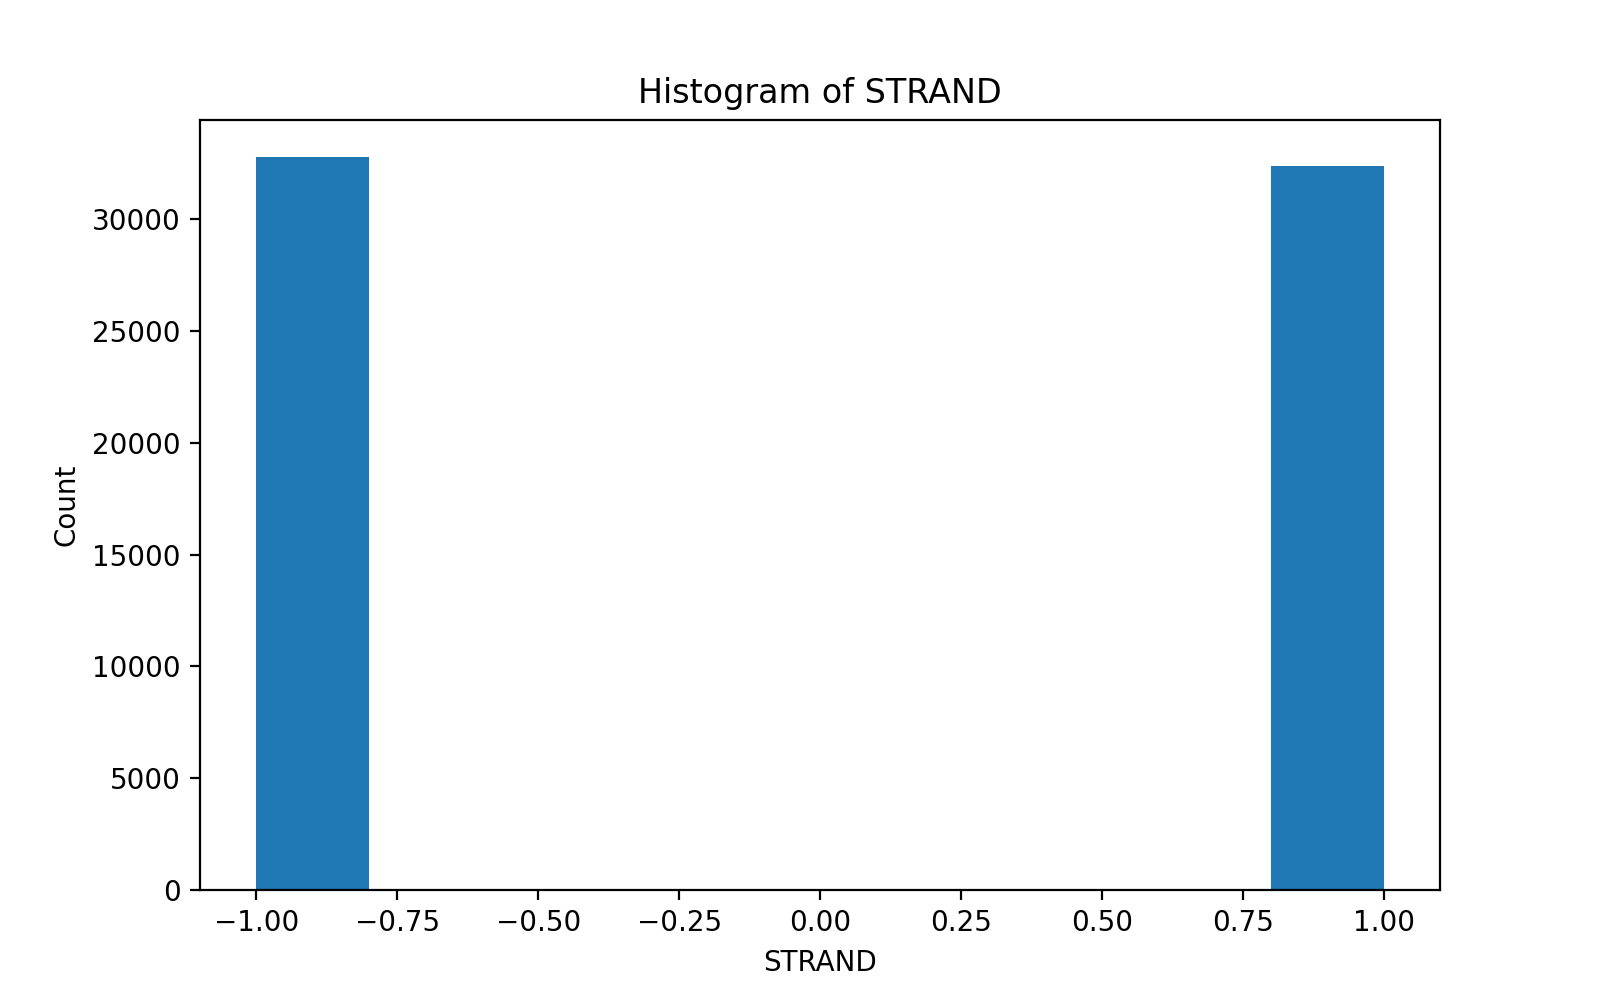

In [ ]:
df['STRAND'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of STRAND')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('STRAND')

plt.show()

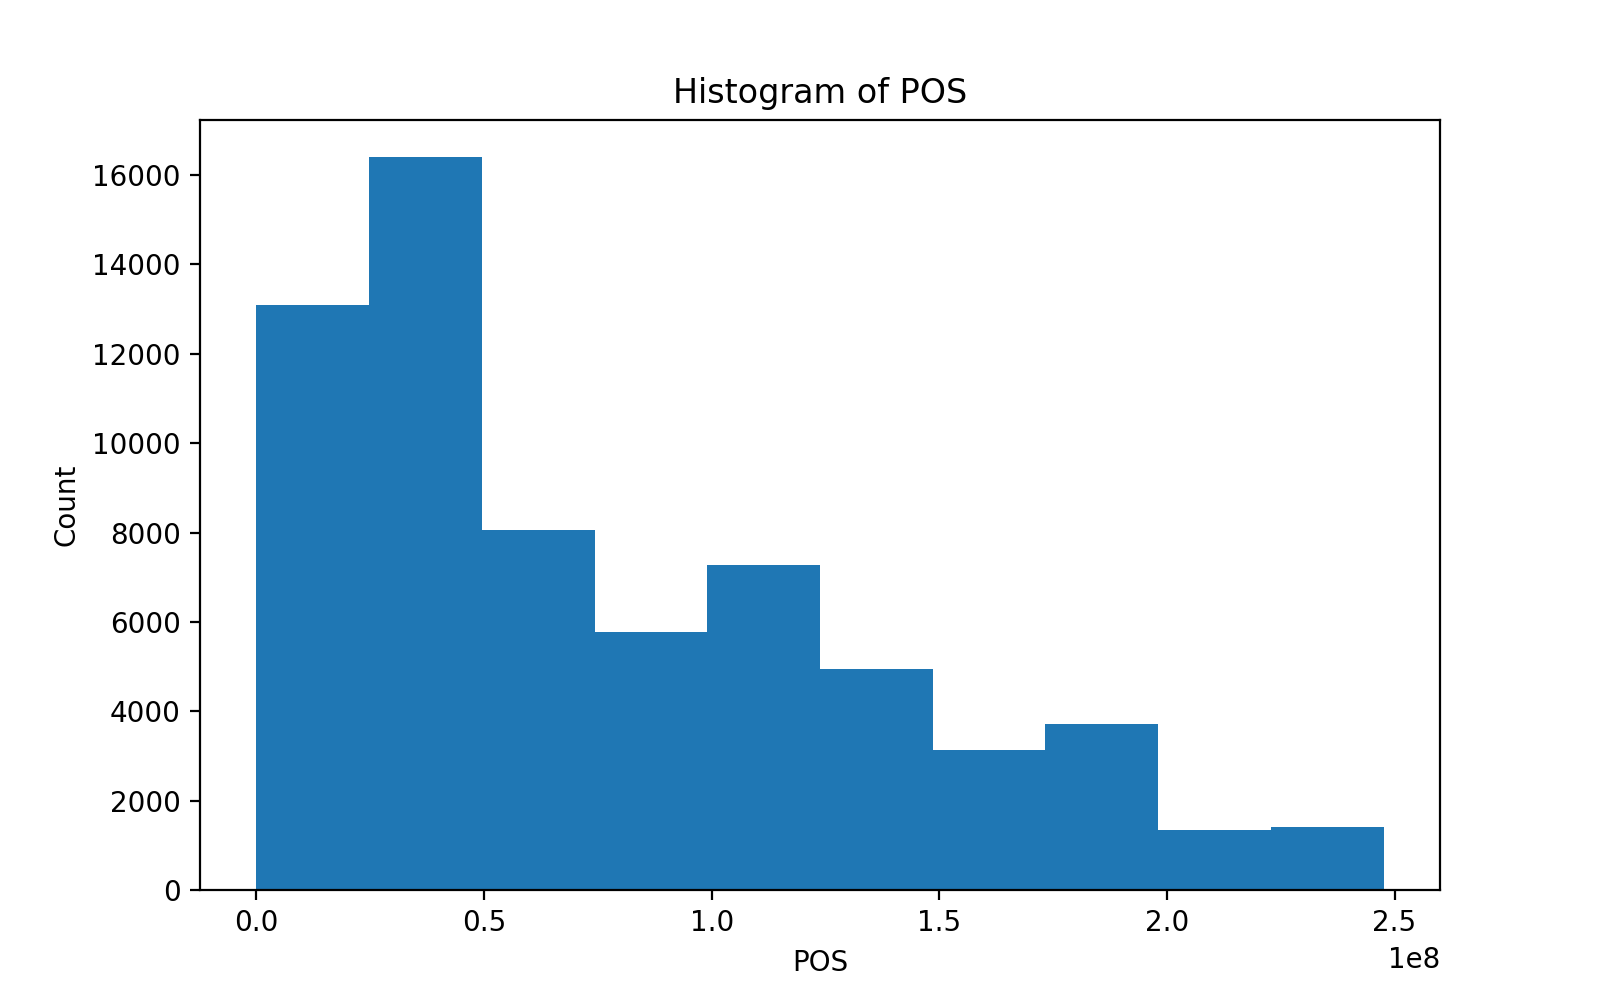

In [ ]:
df['POS'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of POS')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('POS')

plt.show()

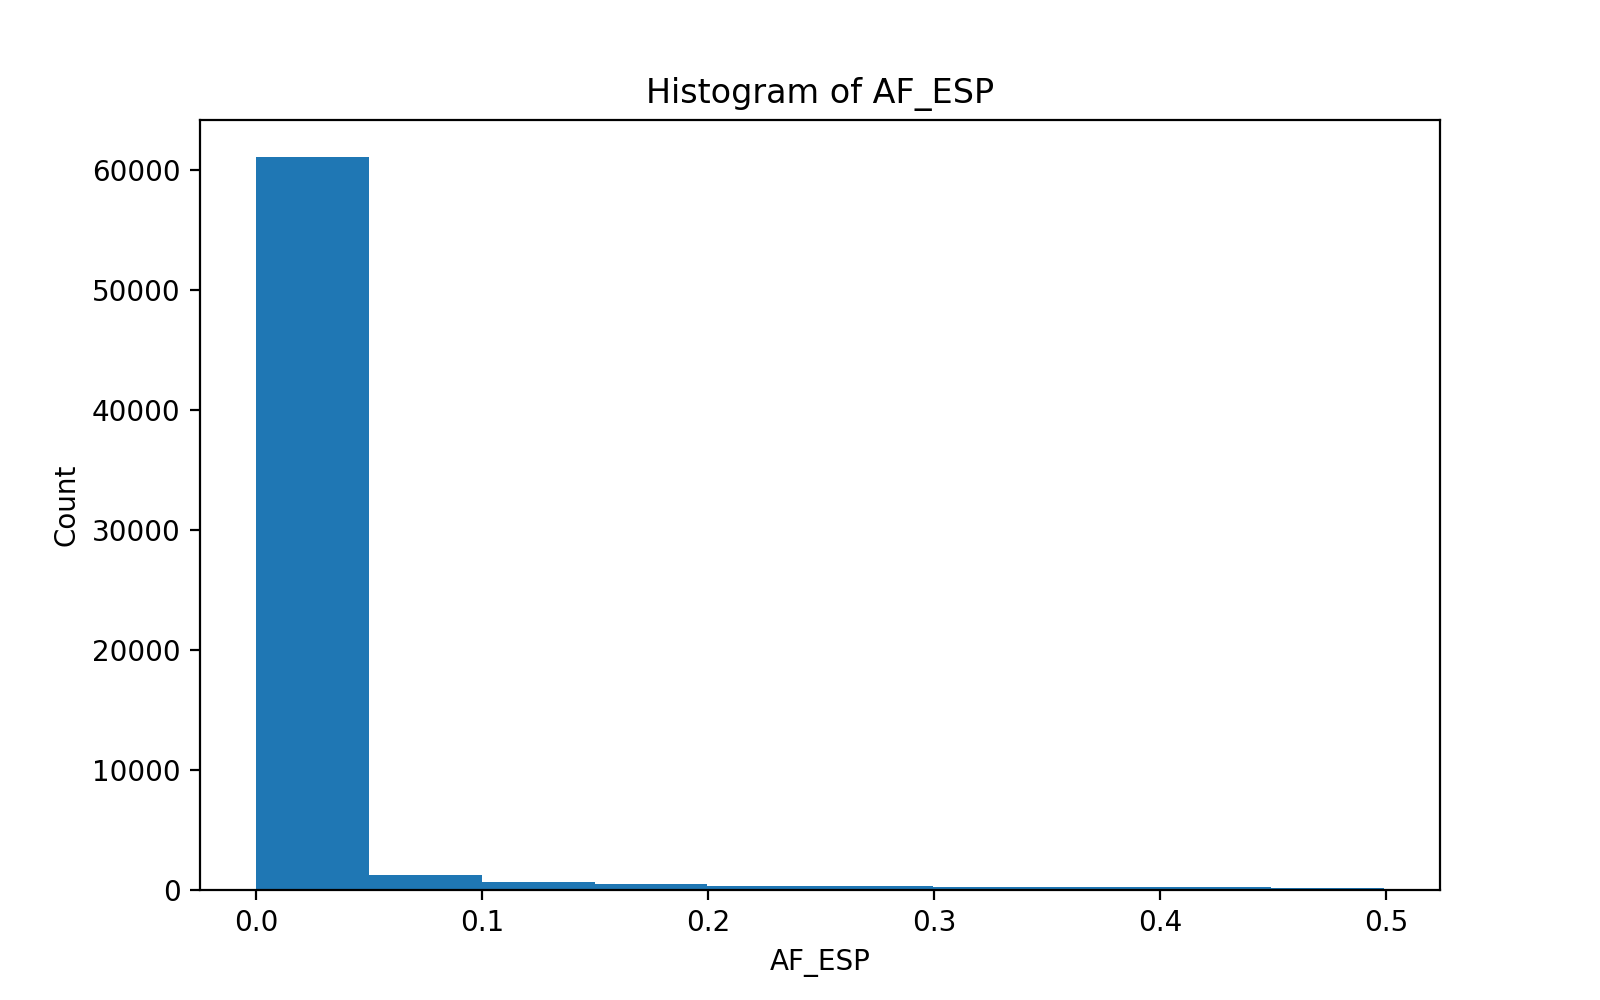

In [ ]:
df['AF_ESP'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of AF_ESP')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('AF_ESP')

plt.show()

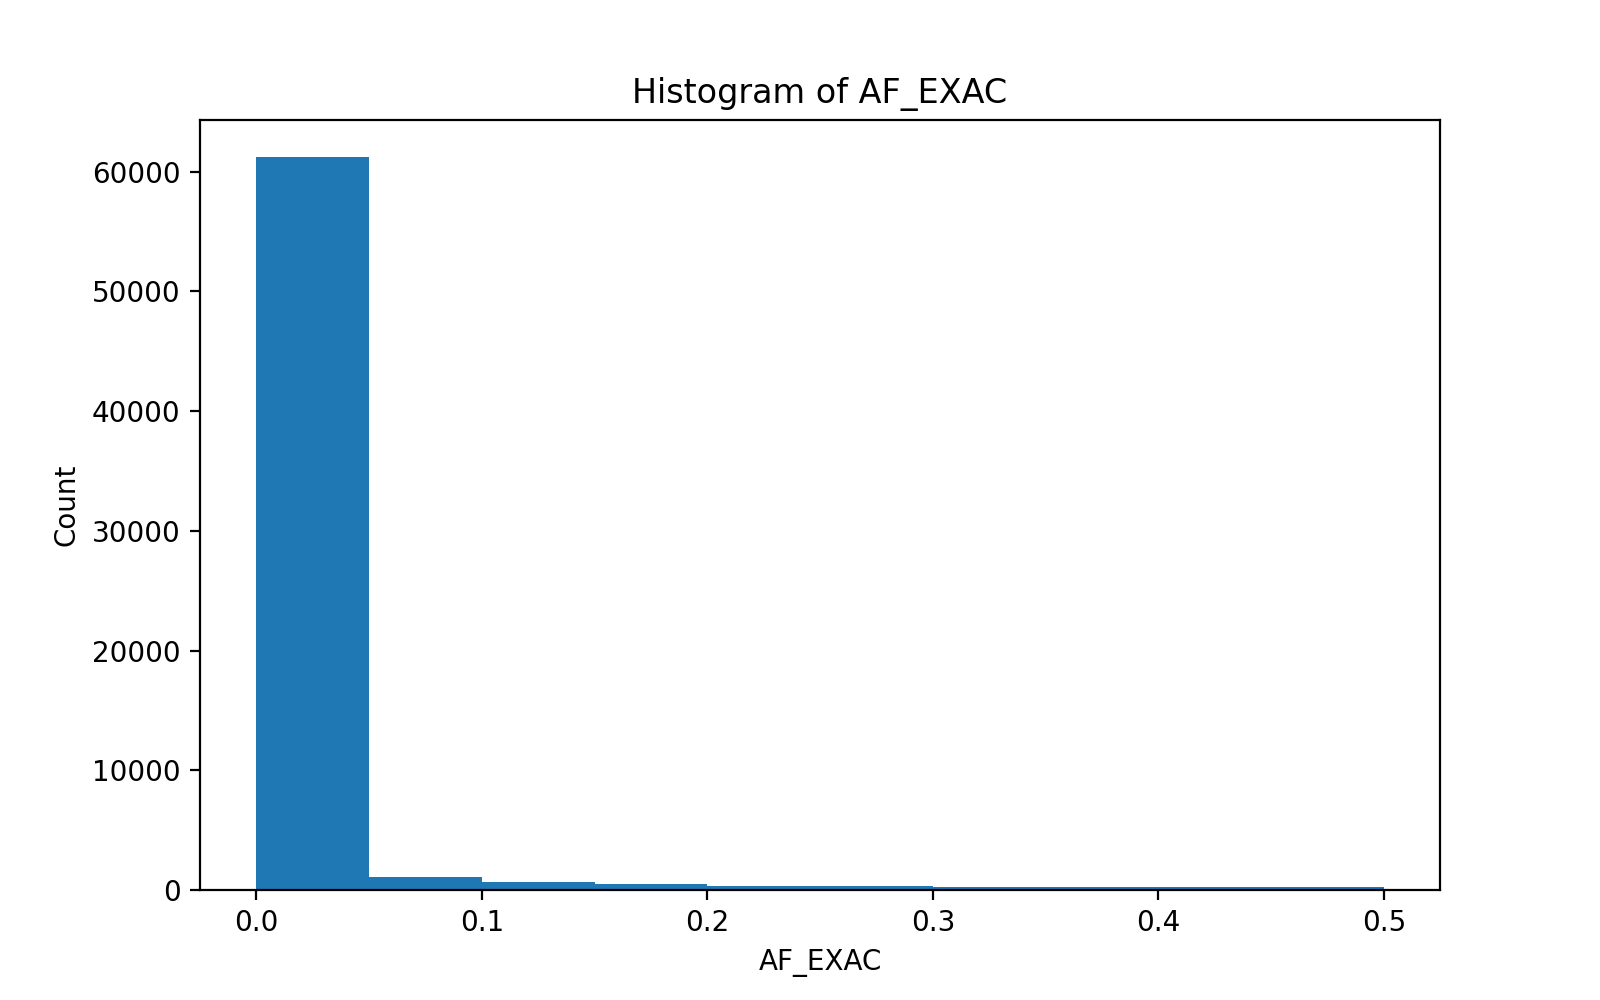

In [ ]:
df['AF_EXAC'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of AF_EXAC')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('AF_EXAC')

plt.show()

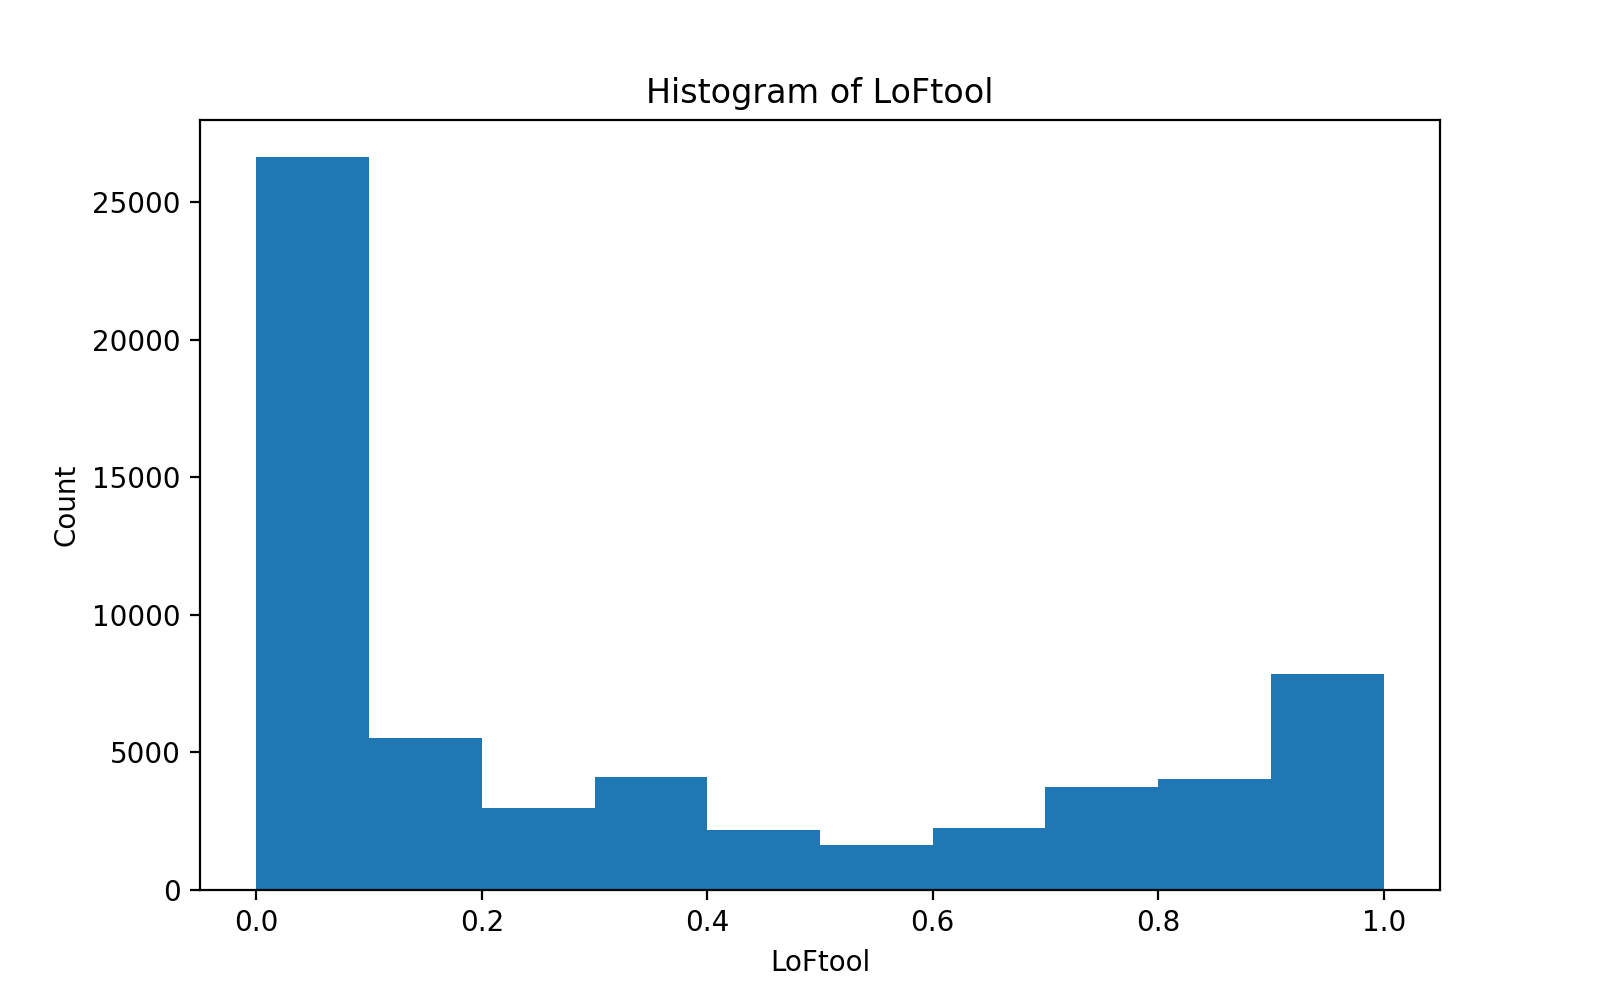

In [ ]:
df['LoFtool'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of LoFtool')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('LoFtool')

plt.show()

# **Bar charts**

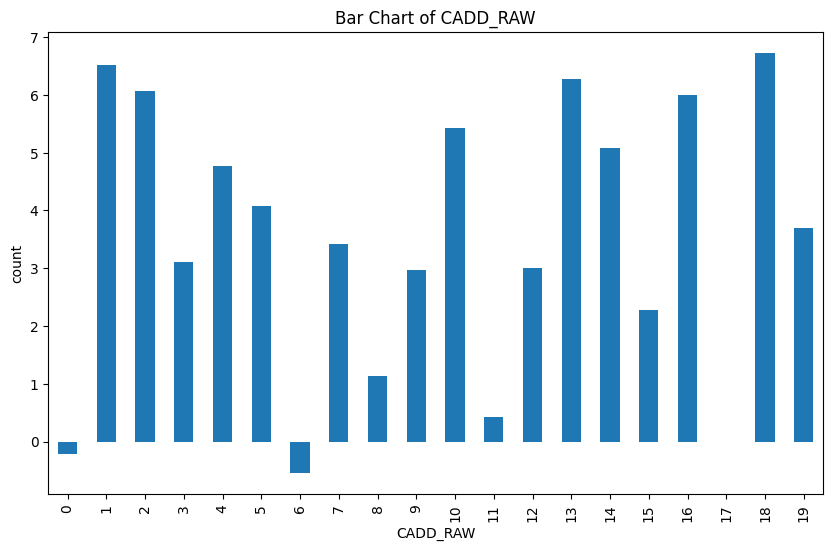

In [19]:
df.CADD_RAW.head(20).plot(kind='bar', figsize=(10, 6))

plt.xlabel('CADD_RAW') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of CADD_RAW') # add title to the plot

plt.show()

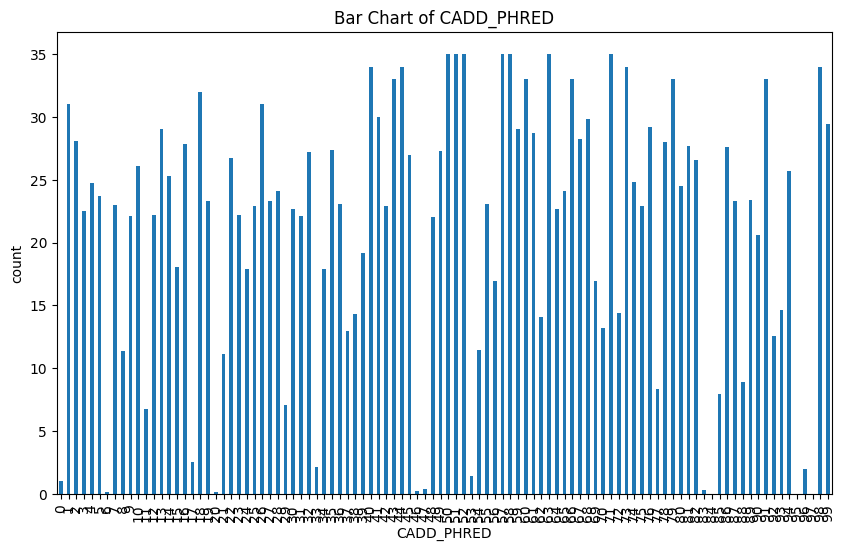

In [26]:
df.CADD_PHRED.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('CADD_PHRED') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of CADD_PHRED') # add title to the plot

plt.show()

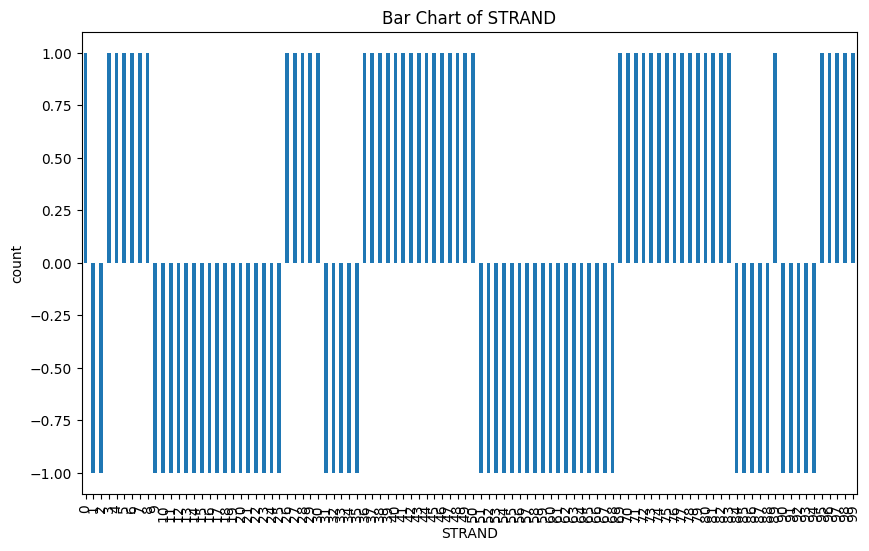

In [27]:
df.STRAND.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('STRAND') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of STRAND') # add title to the plot

plt.show()

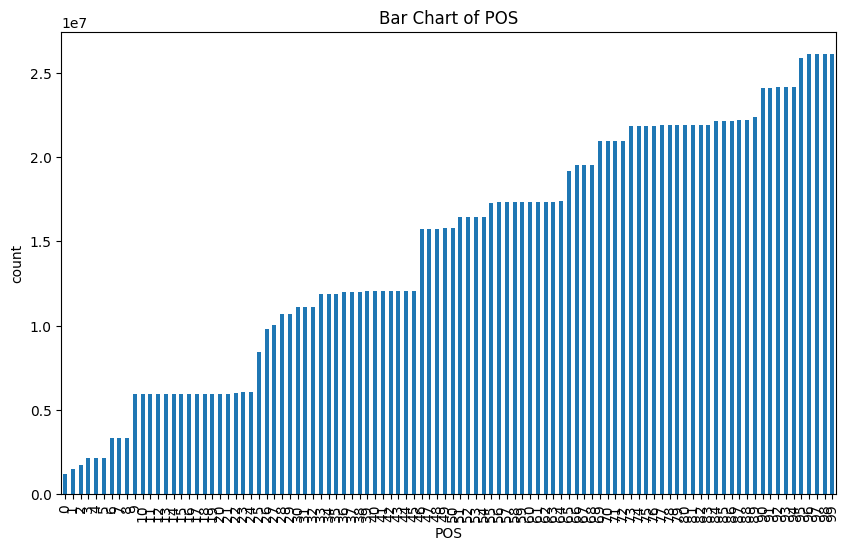

In [28]:
df.POS.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('POS') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of POS') # add title to the plot

plt.show()

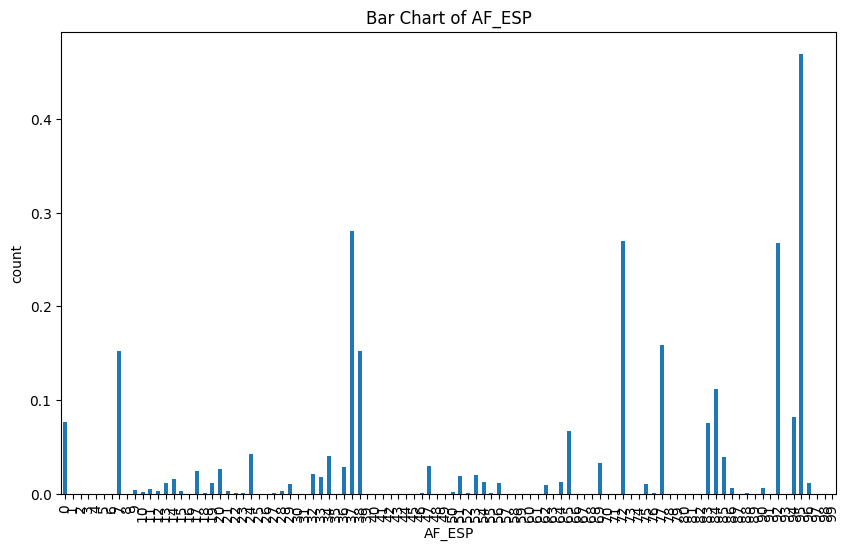

In [29]:
df.AF_ESP.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('AF_ESP') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of AF_ESP') # add title to the plot

plt.show()

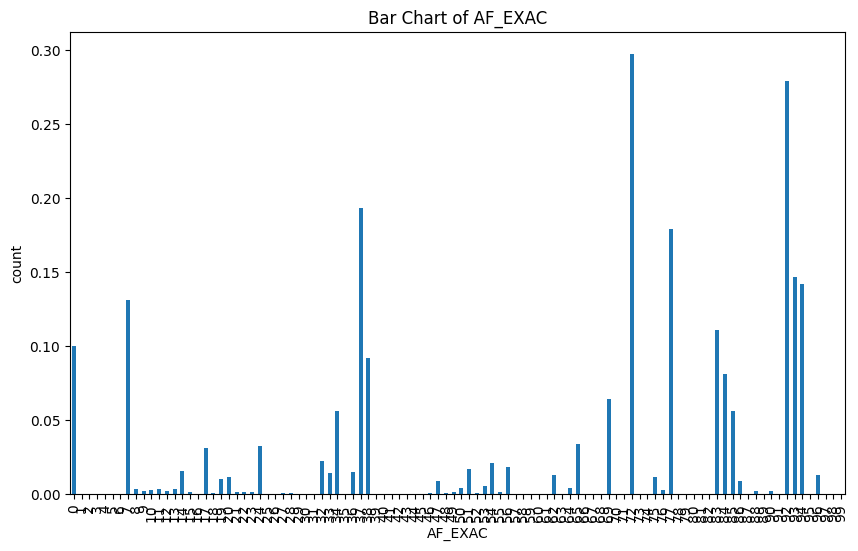

In [30]:
df.AF_EXAC.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('AF_EXAC') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of AF_EXAC') # add title to the plot

plt.show()

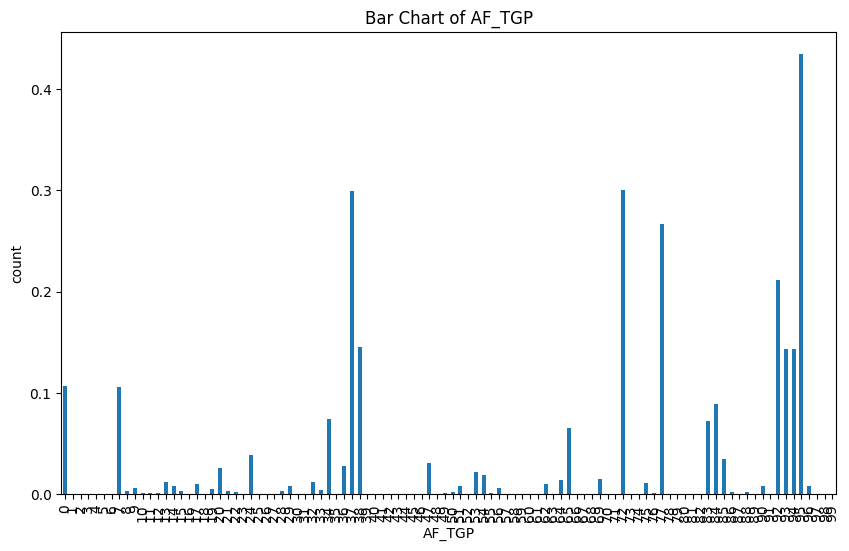

In [31]:
df.AF_TGP.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('AF_TGP') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of AF_TGP') # add title to the plot

plt.show()

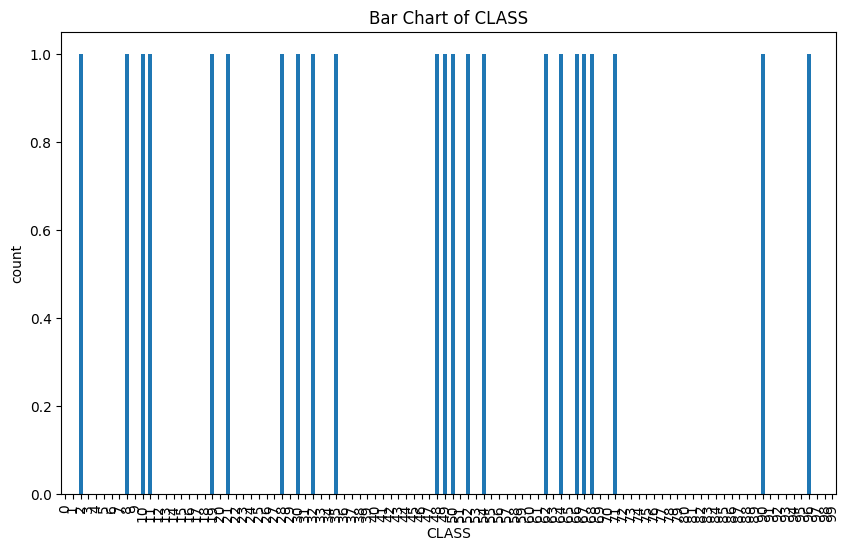

In [32]:
df.CLASS.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('CLASS') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of CLASS') # add title to the plot

plt.show()

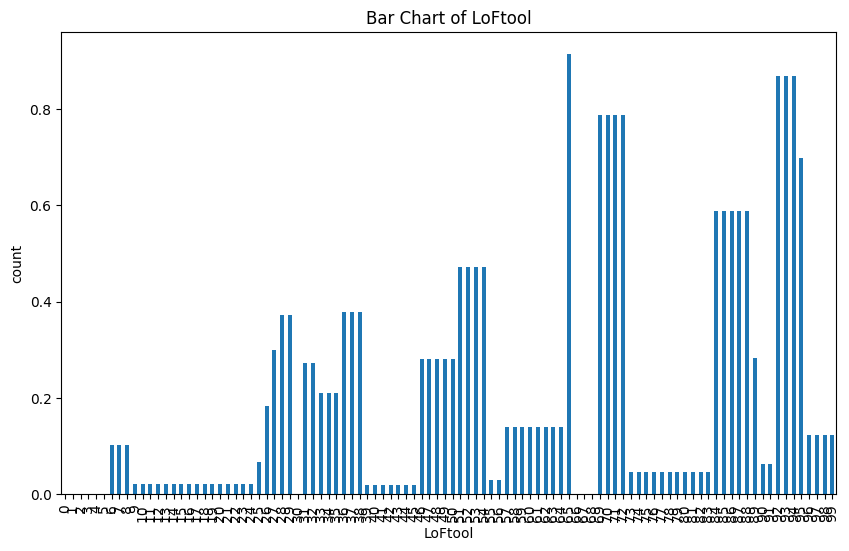

In [33]:
df.LoFtool.head(100).plot(kind='bar', figsize=(10, 6))

plt.xlabel('LoFtool') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Bar Chart of LoFtool') # add title to the plot

plt.show()

# **Pie charts**

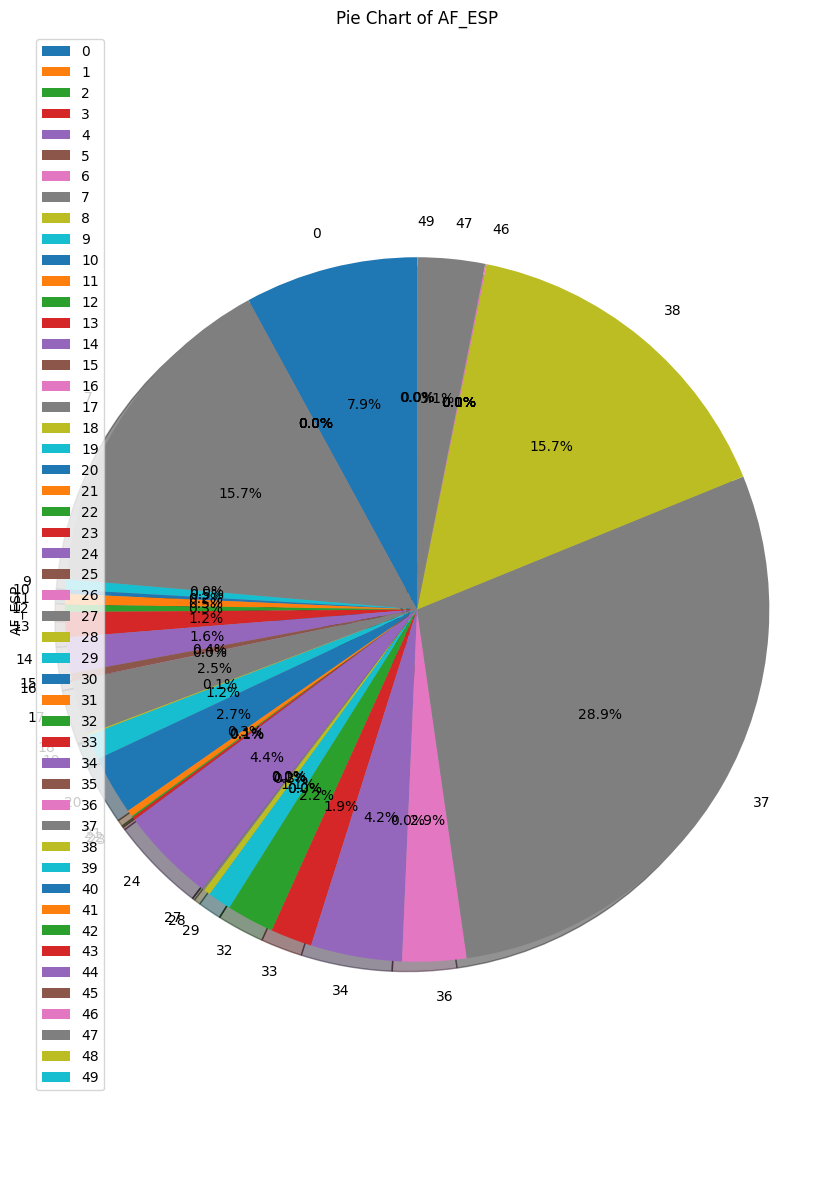

In [50]:
df['AF_ESP'].head(50).plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Pie Chart of AF_ESP')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.index, loc='upper left')

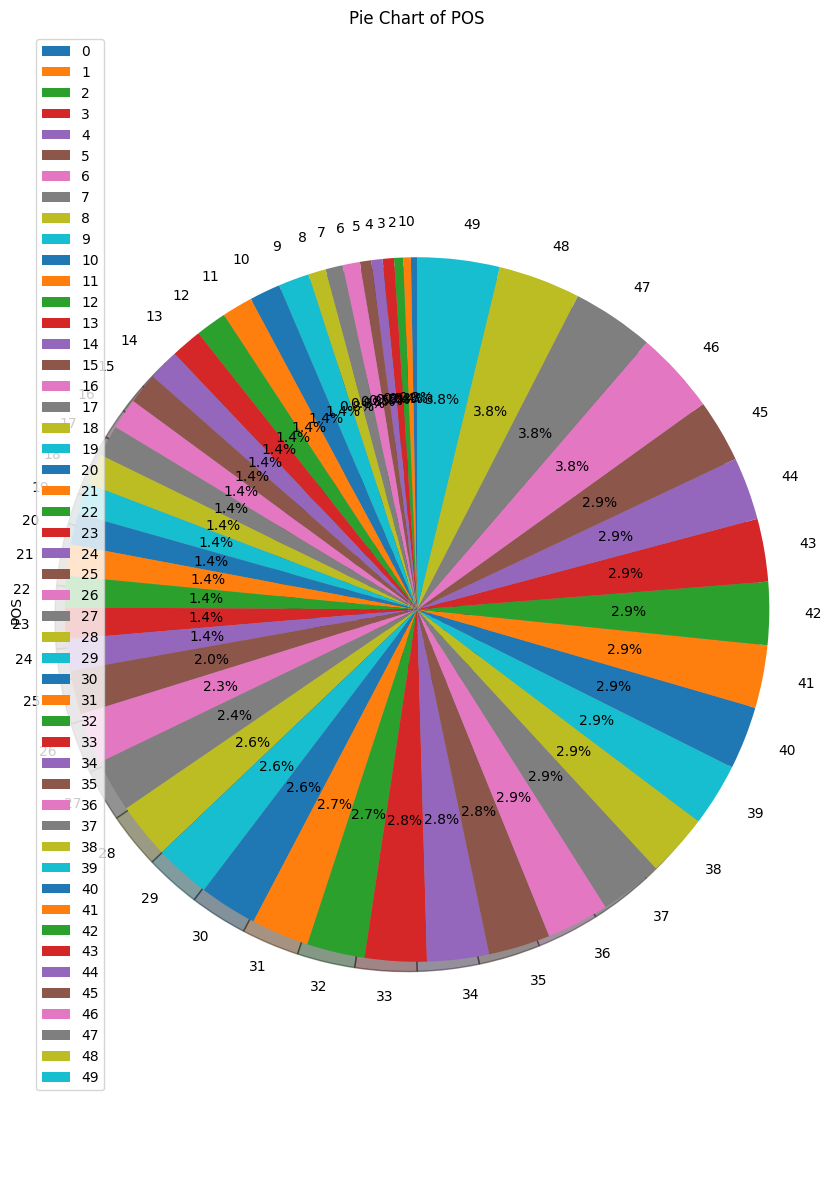

In [51]:
df['POS'].head(50).plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Pie Chart of POS')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.index, loc='upper left')


plt.show()

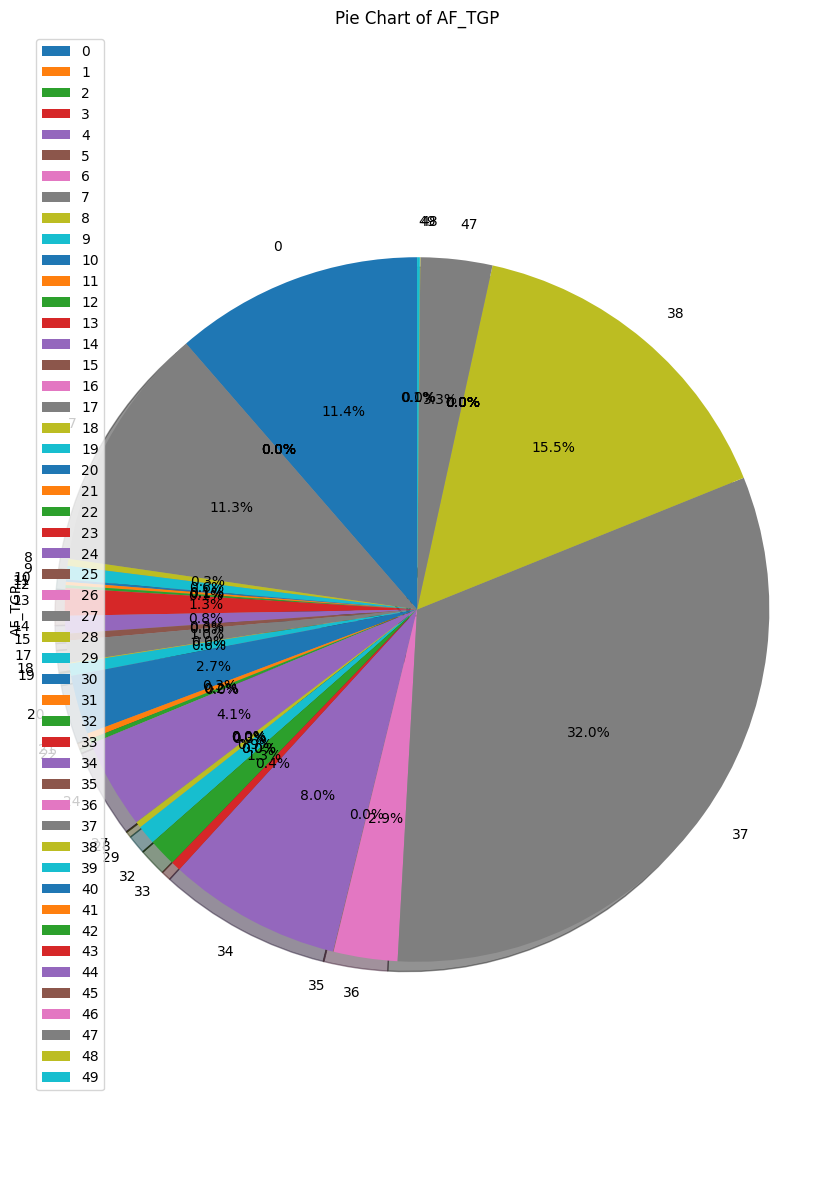

In [52]:
df['AF_TGP'].head(50).plot(kind='pie',
                            figsize=(10,15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Pie Chart of AF_TGP')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.index, loc='upper left')


plt.show()

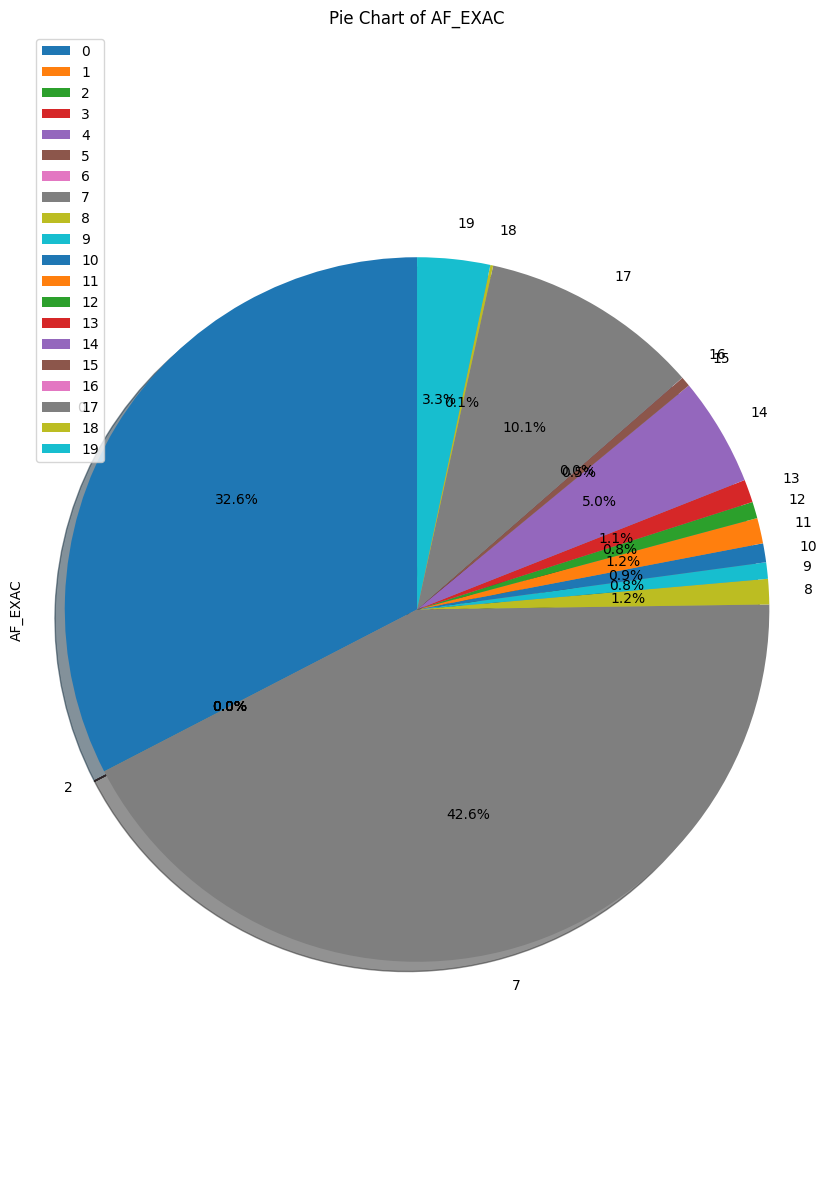

In [53]:
df['AF_EXAC'].head(20).plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Pie Chart of AF_EXAC')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.index, loc='upper left')


plt.show()

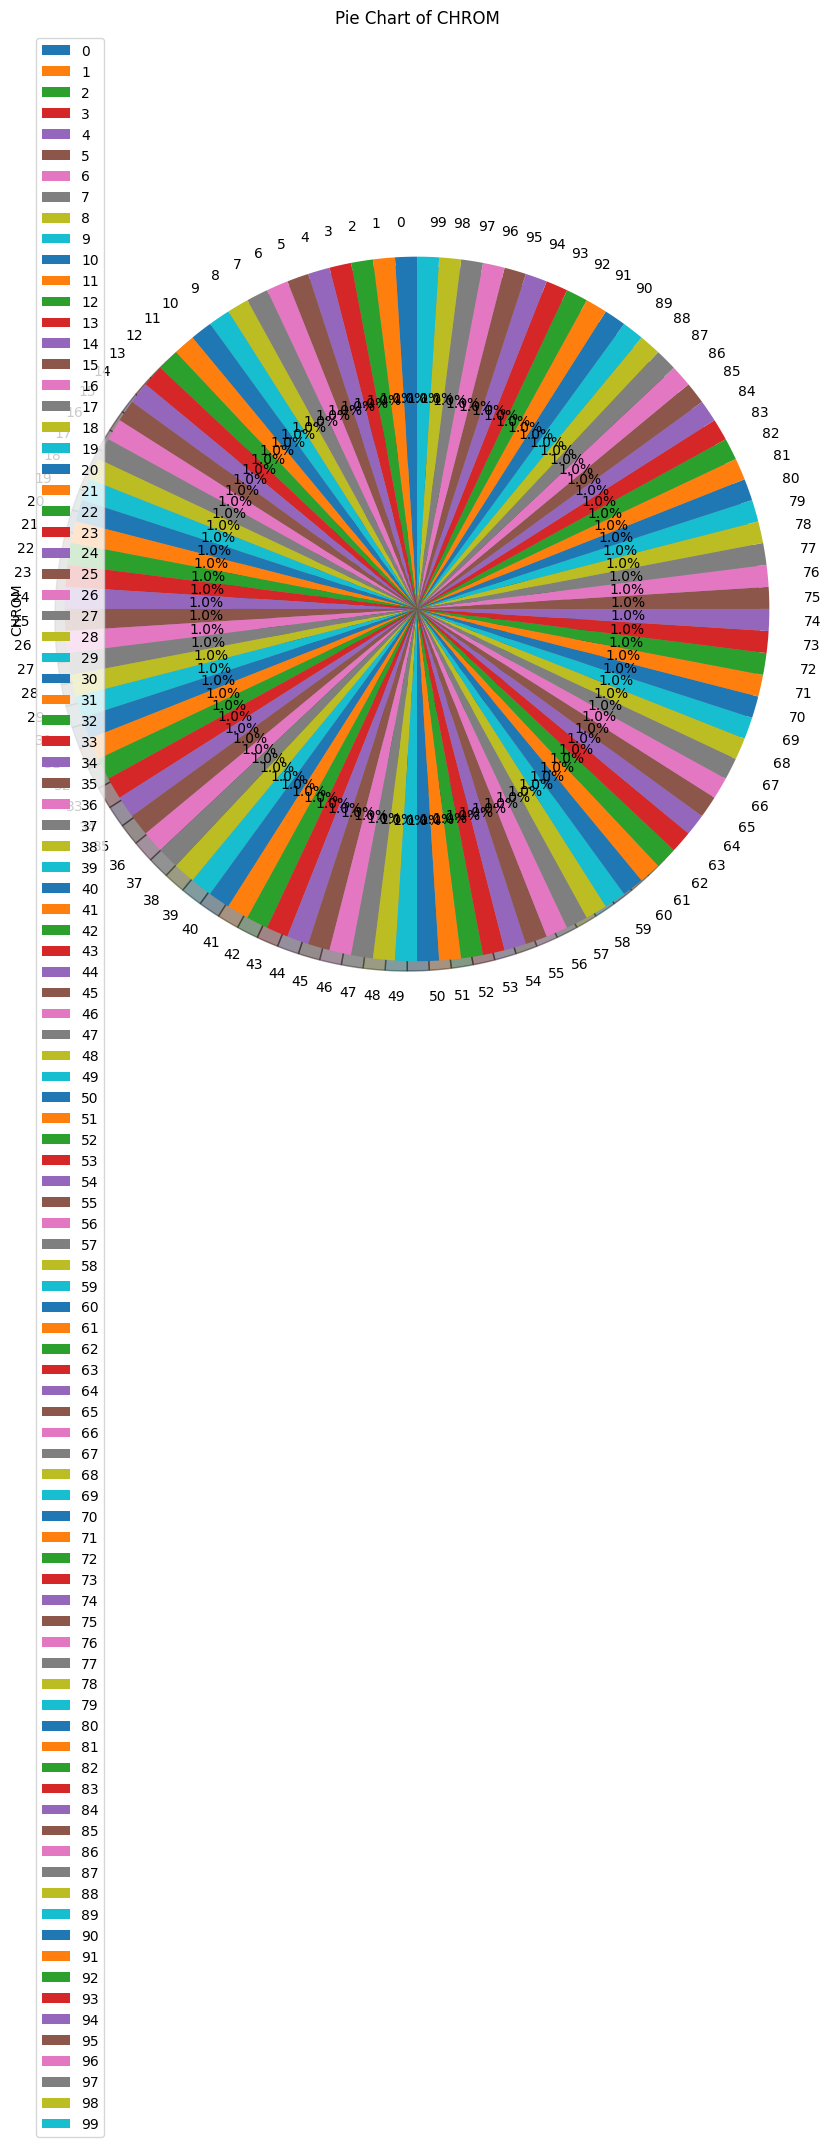

In [84]:
# replacing values
df['CHROM'].replace(['X', 'MT'],[23, 24], inplace=True)

df['CHROM'].astype(int).head(100).plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Pie Chart of CHROM')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.index, loc='upper left')


plt.show()

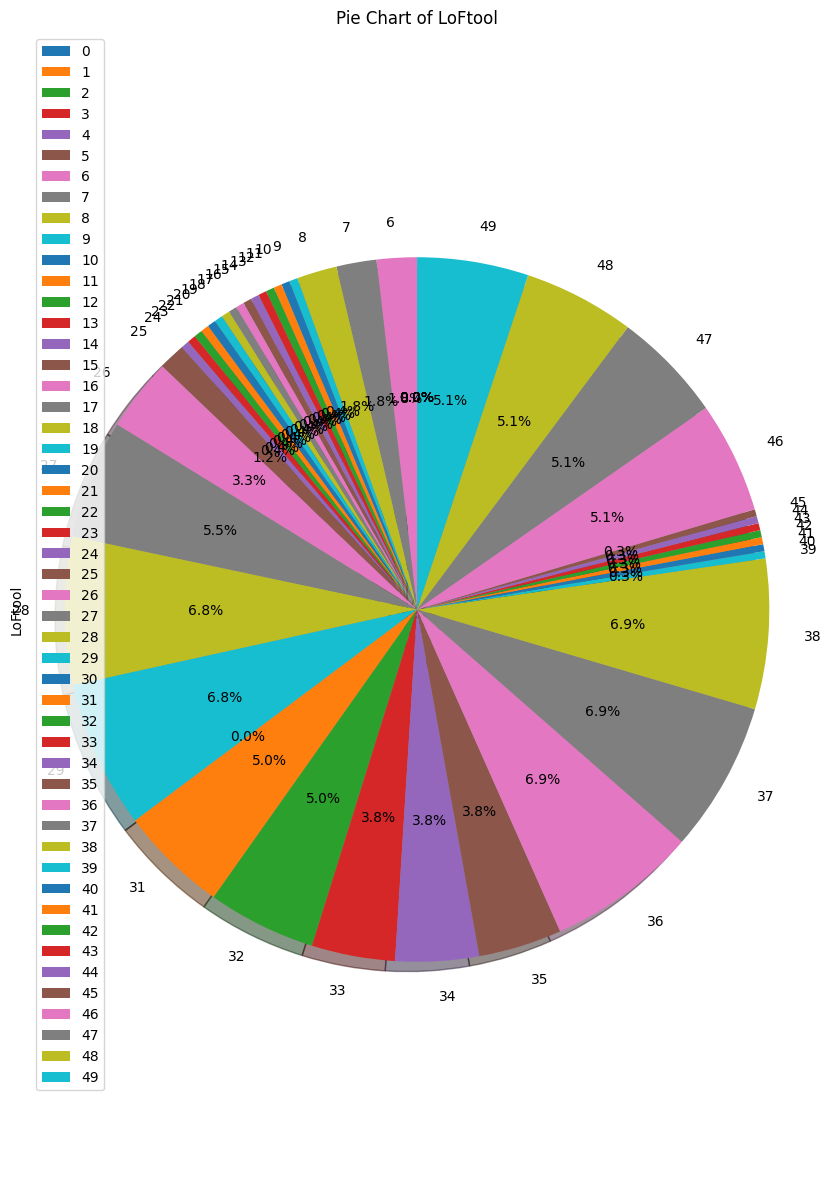

In [54]:
df['LoFtool'].head(50).plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Pie Chart of LoFtool')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.index, loc='upper left')


plt.show()

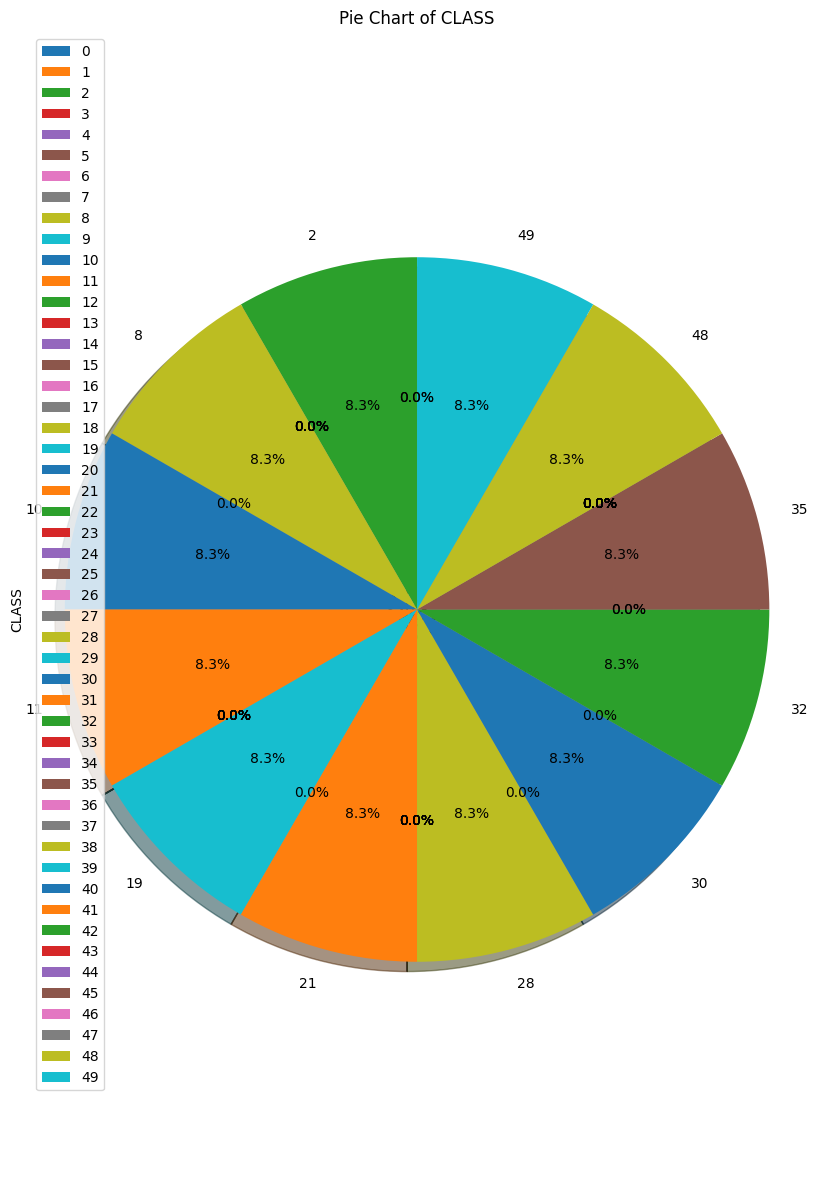

In [55]:
df['CLASS'].head(50).plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Pie Chart of CLASS')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.index, loc='upper left')


plt.show()

# **Scatter plots**

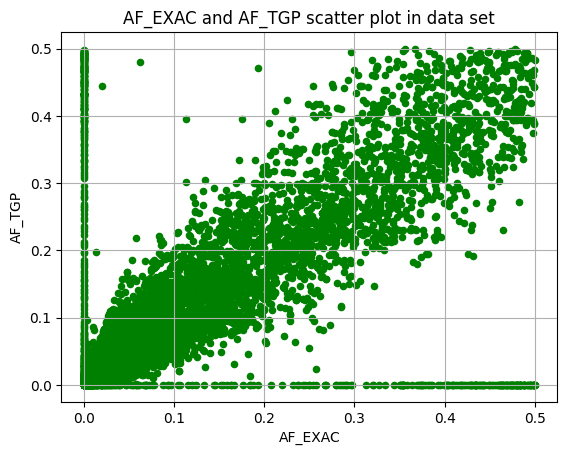

In [58]:
df.plot(kind='scatter',x='AF_EXAC',y='AF_TGP',color='green', grid=True)
plt.xlabel('AF_EXAC')
plt.ylabel('AF_TGP')
plt.title('AF_EXAC and AF_TGP scatter plot in data set')
plt.show()

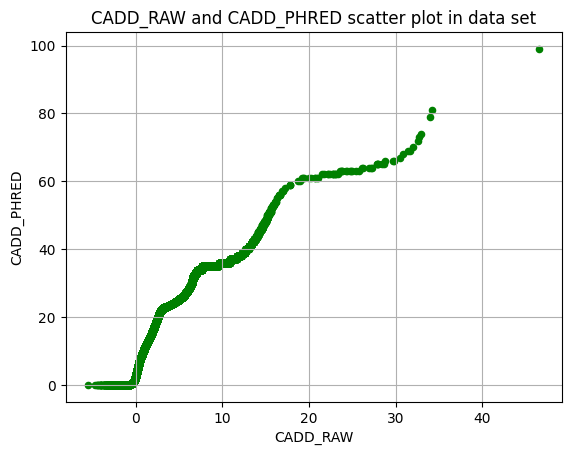

In [60]:
df.plot(kind='scatter',x='CADD_RAW',y='CADD_PHRED',color='green', grid=True)
plt.xlabel('CADD_RAW')
plt.ylabel('CADD_PHRED')
plt.title('CADD_RAW and CADD_PHRED scatter plot in data set')
plt.show()

# **Bubble plots**

In [72]:
# normalize CADD_RAW data
norm_CADD_RAW = (df['CADD_RAW'] - df['CADD_RAW'].min()) / (df['CADD_RAW'].max() - df['CADD_RAW'].min())

# normalize CADD_PHRED data
norm_CADD_PHRED = (df['CADD_PHRED'] - df['CADD_PHRED'].min()) / (df['CADD_PHRED'].max() - df['CADD_PHRED'].min())

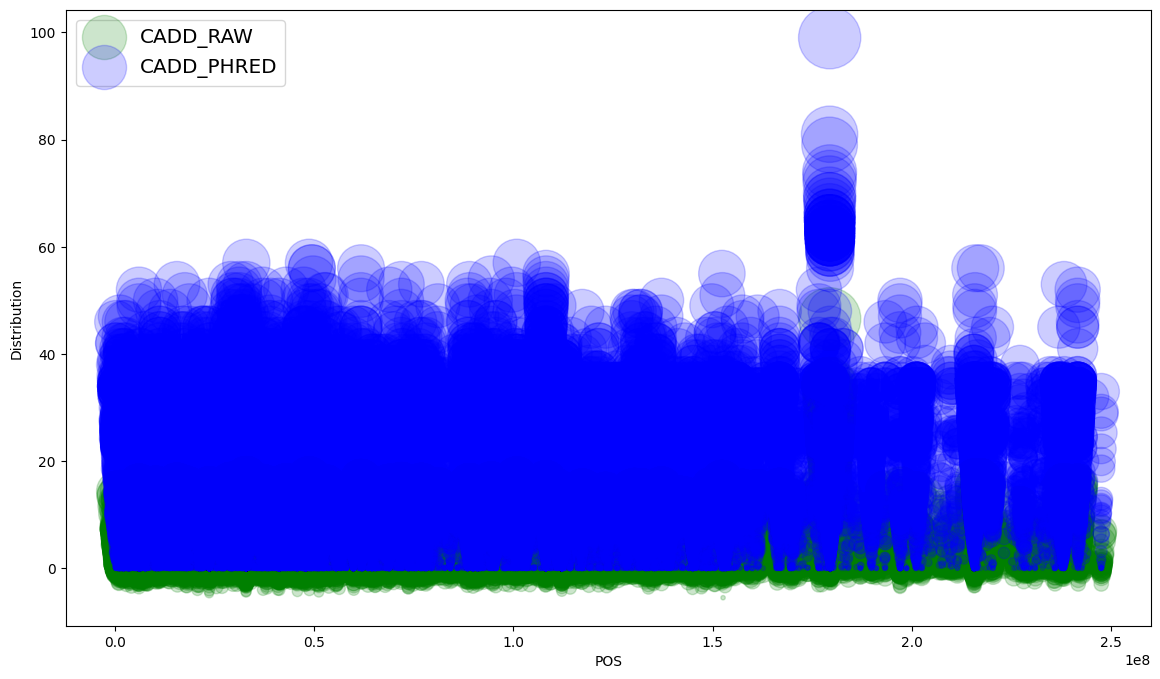

In [78]:
ax0 = df.plot(kind='scatter',
                    x='POS',
                    y='CADD_RAW',
                    figsize=(14, 8),
                    alpha=0.2,  # transparency
                    color='green',
                    s=norm_CADD_RAW * 2000 + 10,  # pass in weights
                    #xlim=(0, 20)
                    )


ax1 = df.plot(kind='scatter',
                    x='POS',
                    y='CADD_PHRED',
                    alpha=0.2,
                    color="blue",
                    s=norm_CADD_PHRED * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Distribution')
ax0.set_title('')
ax0.legend(['CADD_RAW', 'CADD_PHRED'], loc='upper left', fontsize='x-large')

In [75]:
# normalize AF_ESP data
norm_AF_ESP = (df['AF_ESP'] - df['AF_ESP'].min()) / (df['AF_ESP'].max() - df['AF_ESP'].min())

# normalize AF_EXAC data
norm_AF_EXAC = (df['AF_EXAC'] - df['AF_EXAC'].min()) / (df['AF_EXAC'].max() - df['AF_EXAC'].min())

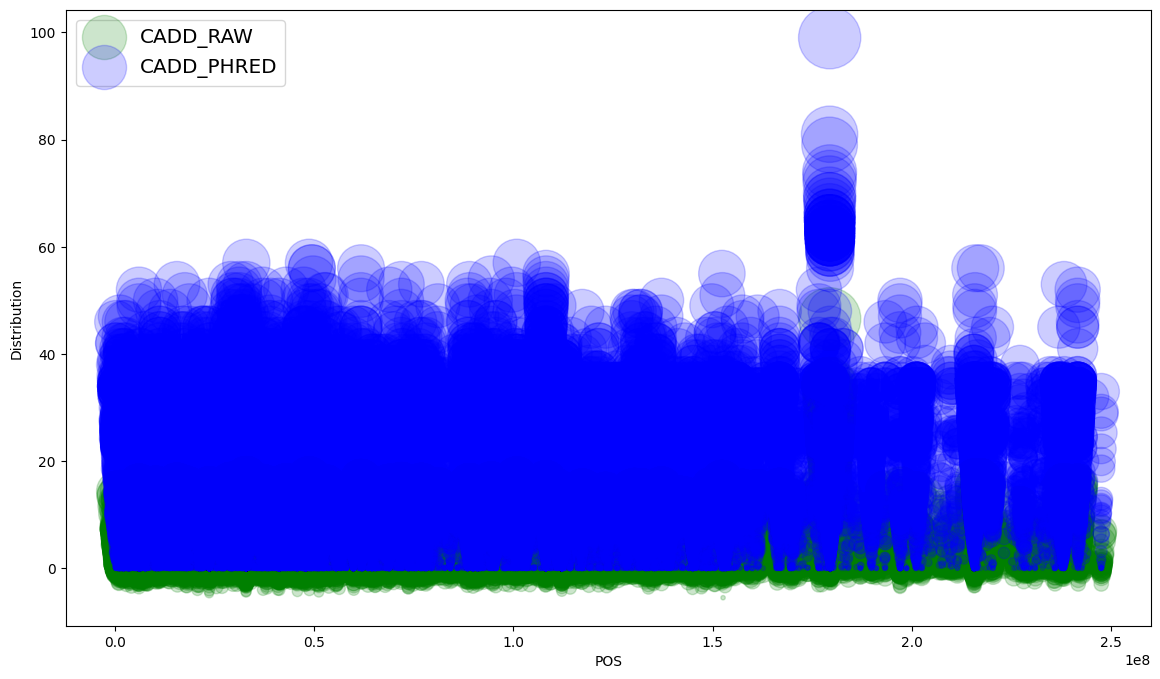

In [79]:
ax0 = df.plot(kind='scatter',
                    x='POS',
                    y='CADD_RAW',
                    figsize=(14, 8),
                    alpha=0.2,  # transparency
                    color='green',
                    s=norm_CADD_RAW * 2000 + 10,  # pass in weights
                    #xlim=(0, 20)
                    )


ax1 = df.plot(kind='scatter',
                    x='POS',
                    y='CADD_PHRED',
                    alpha=0.2,
                    color="blue",
                    s=norm_CADD_PHRED * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Distribution')
ax0.set_title('')
ax0.legend(['CADD_RAW', 'CADD_PHRED'], loc='upper left', fontsize='x-large')

In [80]:
# replacing values
df['CHROM'].replace(['X', 'MT'],[23, 24], inplace=True)
if df['CHROM'].dtype not in ['str', 'bytes']:
    df['CHROM'] = df['CHROM'].astype('str')

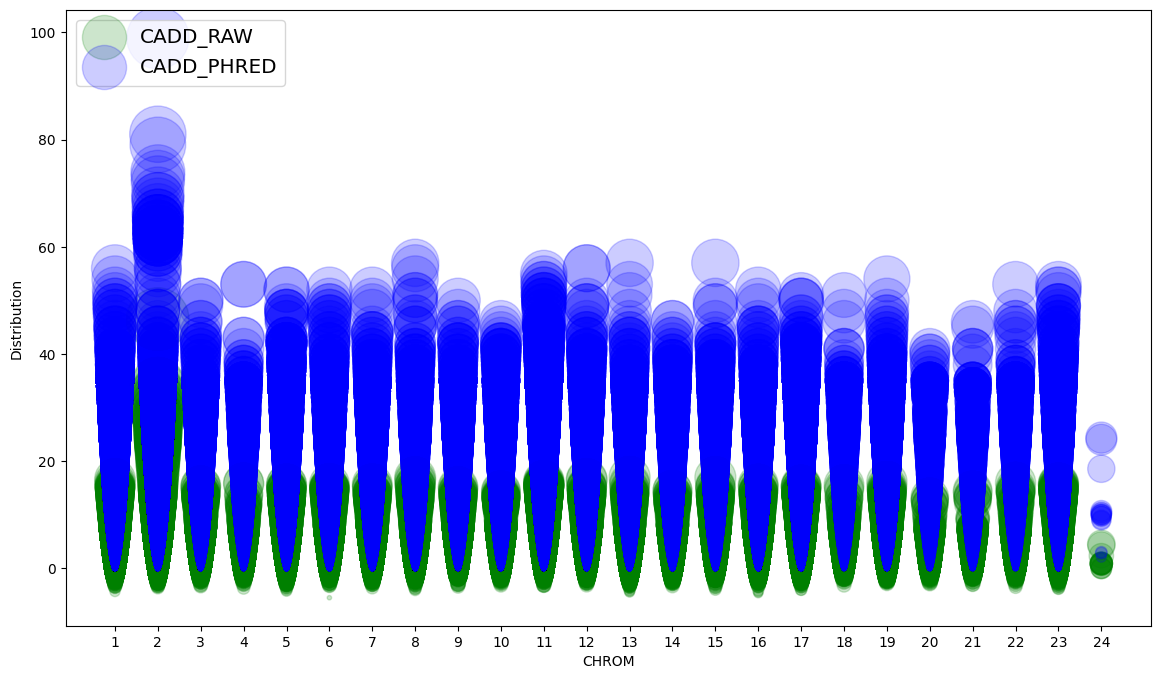

In [81]:
ax0 = df.plot(kind='scatter',
                    x='CHROM',
                    y='CADD_RAW',
                    figsize=(14, 8),
                    alpha=0.2,  # transparency
                    color='green',
                    s=norm_CADD_RAW * 2000 + 10,  # pass in weights
                    #xlim=(0, 20)
                    )


ax1 = df.plot(kind='scatter',
                    x='CHROM',
                    y='CADD_PHRED',
                    alpha=0.2,
                    color="blue",
                    s=norm_CADD_PHRED * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Distribution')
ax0.set_title('')
ax0.legend(['CADD_RAW', 'CADD_PHRED'], loc='upper left', fontsize='x-large')

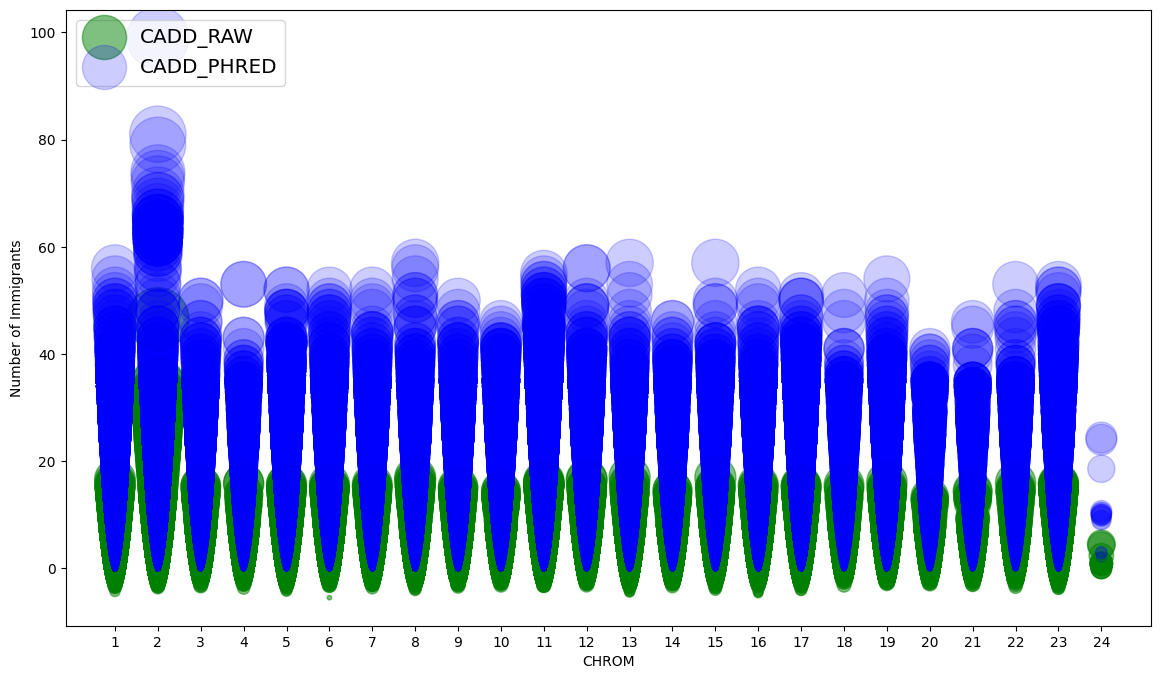

In [86]:
if df['CHROM'].dtype not in ['str', 'bytes']:
    df['CHROM'] = df['CHROM'].astype('str')
ax0 = df.plot(kind='scatter',
                    x='CHROM',
                    y='CADD_RAW',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_CADD_RAW * 2000 + 10,  # pass in weights
                    #xlim=(0, 20)
                    )


ax1 = df.plot(kind='scatter',
                    x='CHROM',
                    y='CADD_PHRED',
                    alpha=0.2,
                    color="blue",
                    s=norm_CADD_PHRED * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('')
ax0.legend(['CADD_RAW', 'CADD_PHRED'], loc='upper left', fontsize='x-large')